In [1]:
import os

REV_DIR = "../enriched_sample_subset"
results = []

# Step through all files in directory
for filename in os.listdir(REV_DIR):
    if filename.endswith(".jsonl"):
        filepath = os.path.join(REV_DIR, filename)
        with open(filepath, "r", encoding="utf-8") as f:
            num_lines = sum(1 for _ in f)
        name_without_ext = filename[:-6]  # remove ".jsonl"
        results.append({
            "name": name_without_ext,
            "num_revisions": num_lines
        })

# Sort descending by line count
sorted_results = sorted(results, key=lambda x: x["num_revisions"], reverse=True)

# Print as a simple table
print(f"{'File':<50} {'Num. Revisions':>5}")
print("-" * 60)
total = 0
for entry in sorted_results:
    print(f"{entry['name']:<50} {entry['num_revisions']:>5}")
    total +=entry['num_revisions']

print(total)

File                                               Num. Revisions
------------------------------------------------------------
Armenian genocide_enriched_subsampled               1182
Armenia_enriched_subsampled                          865
Second Nagorno-Karabakh War_enriched_subsampled      669
Yerevan_enriched_subsampled                          547
Nagorno-Karabakh_enriched_subsampled                 542
Adana_enriched_subsampled                            513
First Nagorno-Karabakh War_enriched_subsampled       476
Armenians_enriched_subsampled                        472
Republic of Artsakh_enriched_subsampled              457
Nakhchivan Autonomous Republic_enriched_subsampled   372
Armenian_language_enriched_subsampled                358
Mount_Ararat_enriched_subsampled                     338
Armenian_genocide_recognition_enriched_subsampled    324
Shusha_enriched_subsampled                           313
Dolma_enriched_subsampled                            302
Urartu_enriched_su

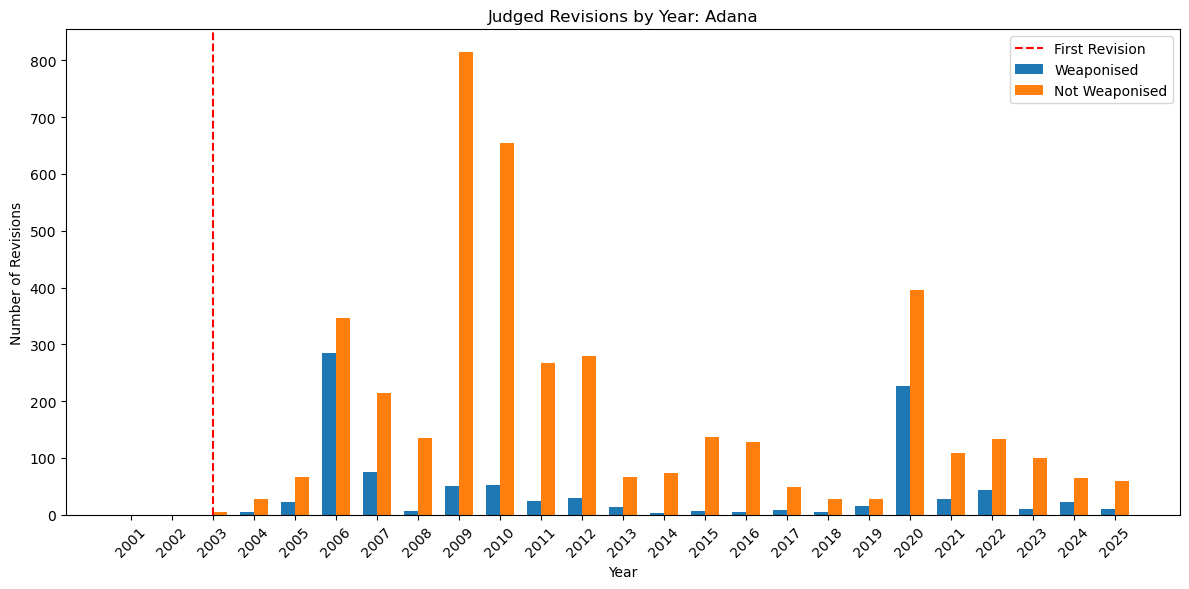

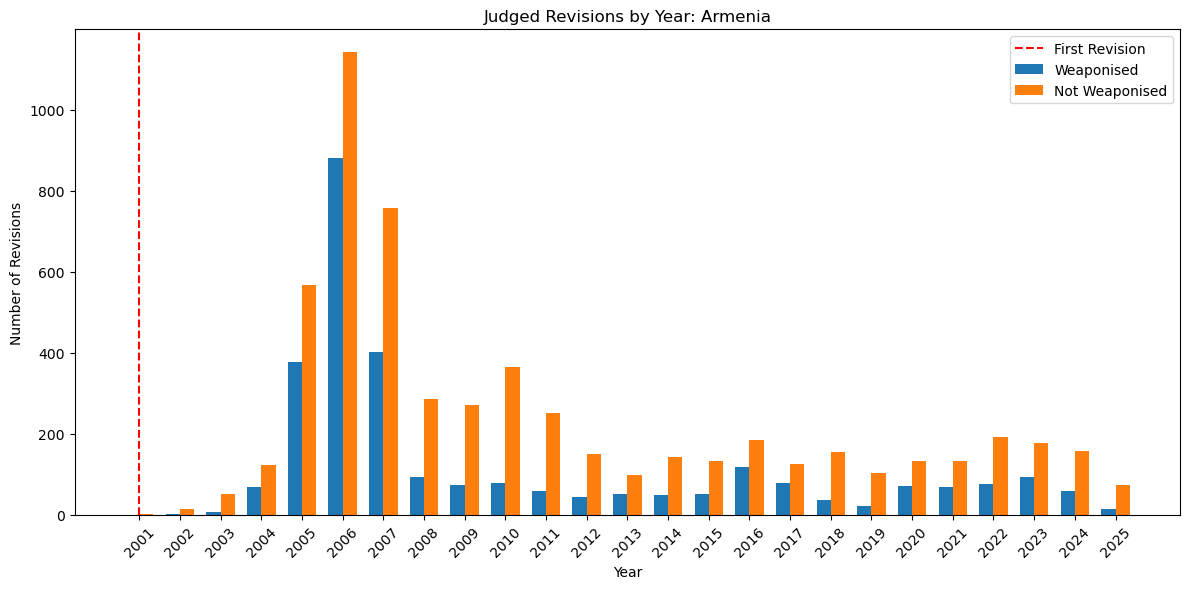

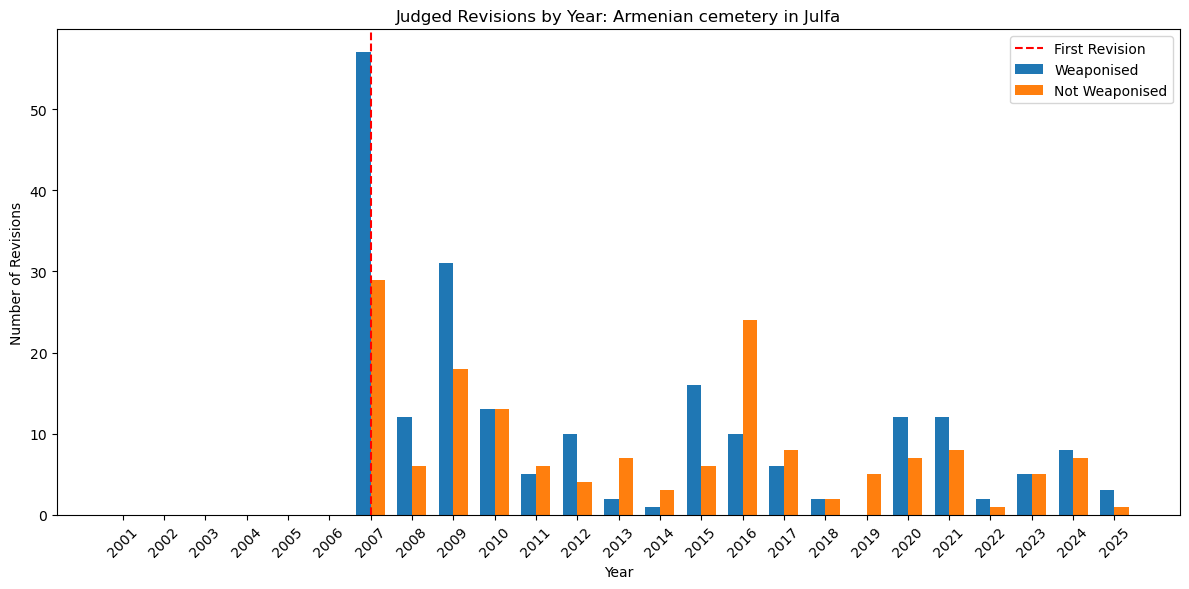

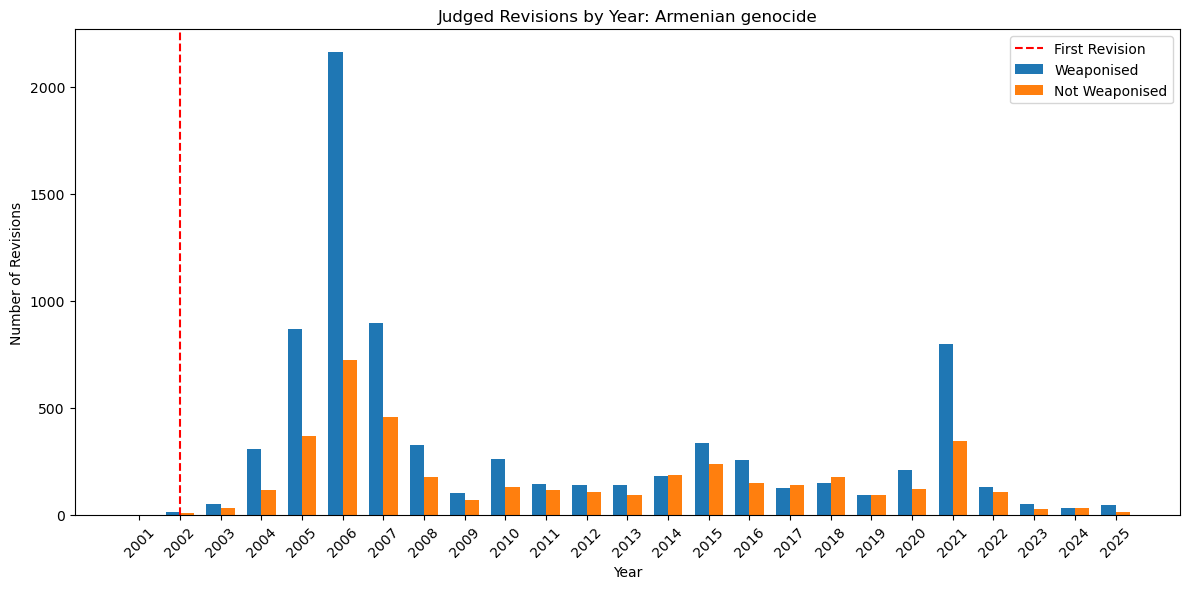

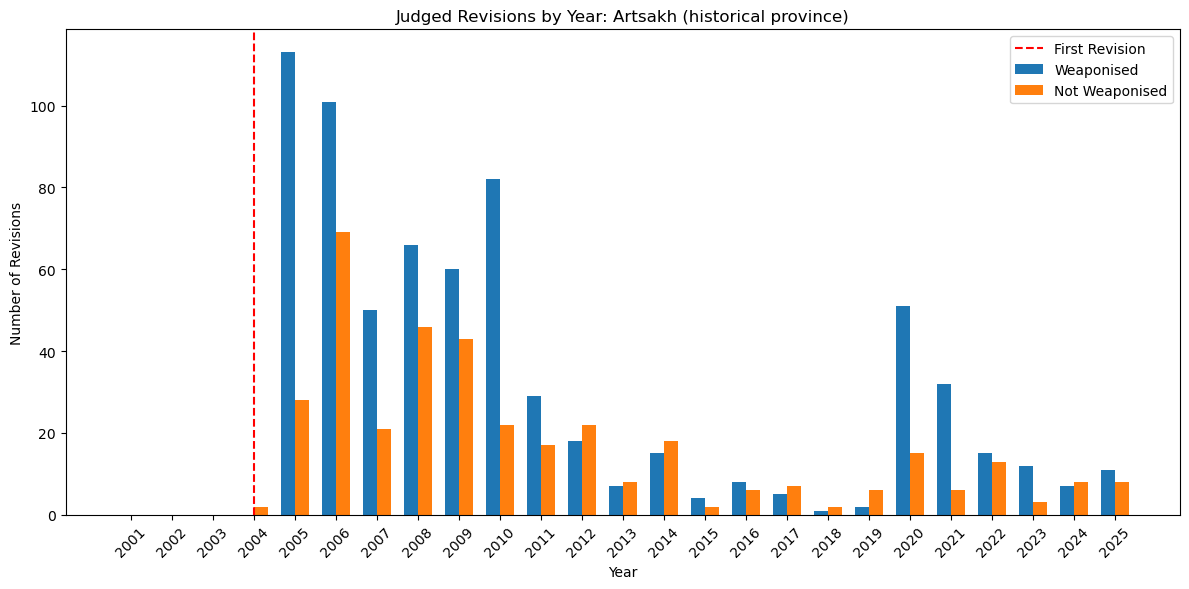

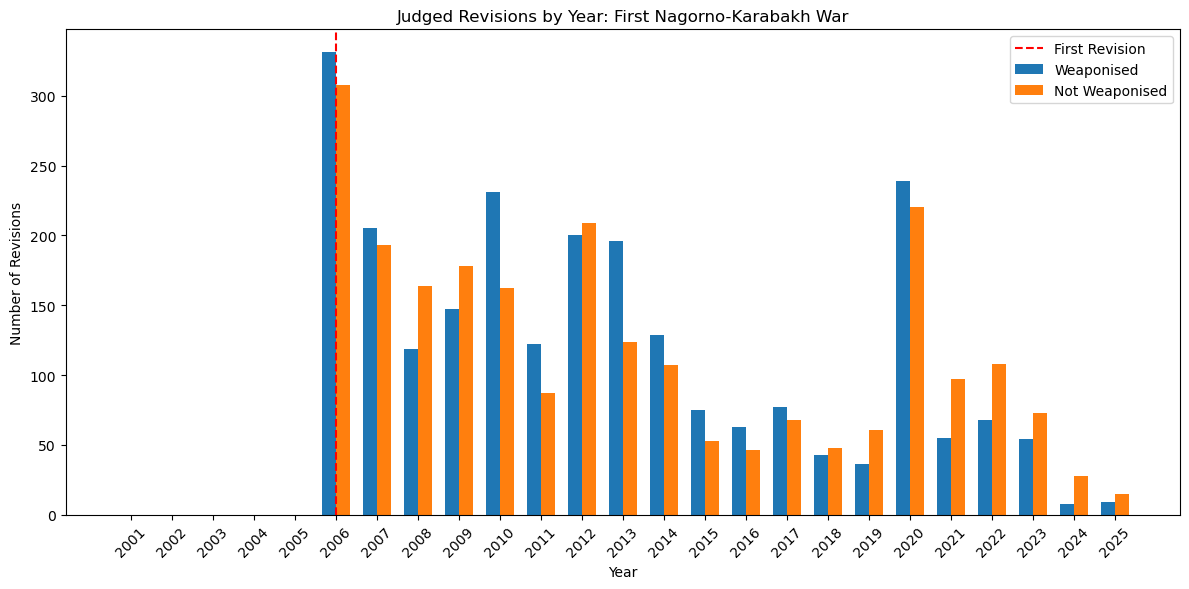

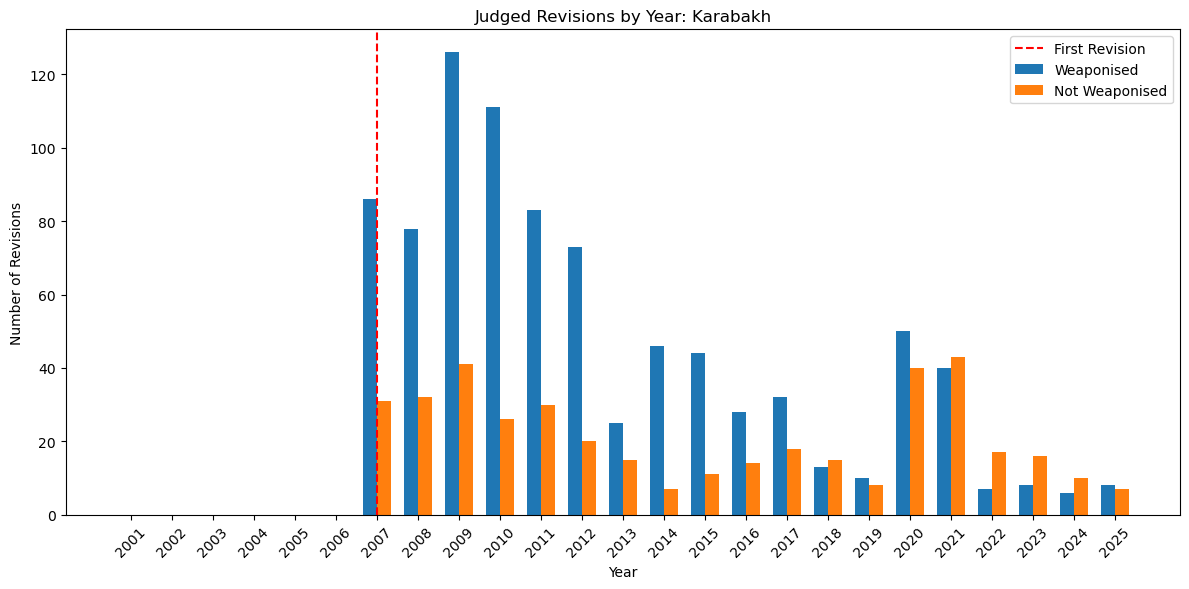

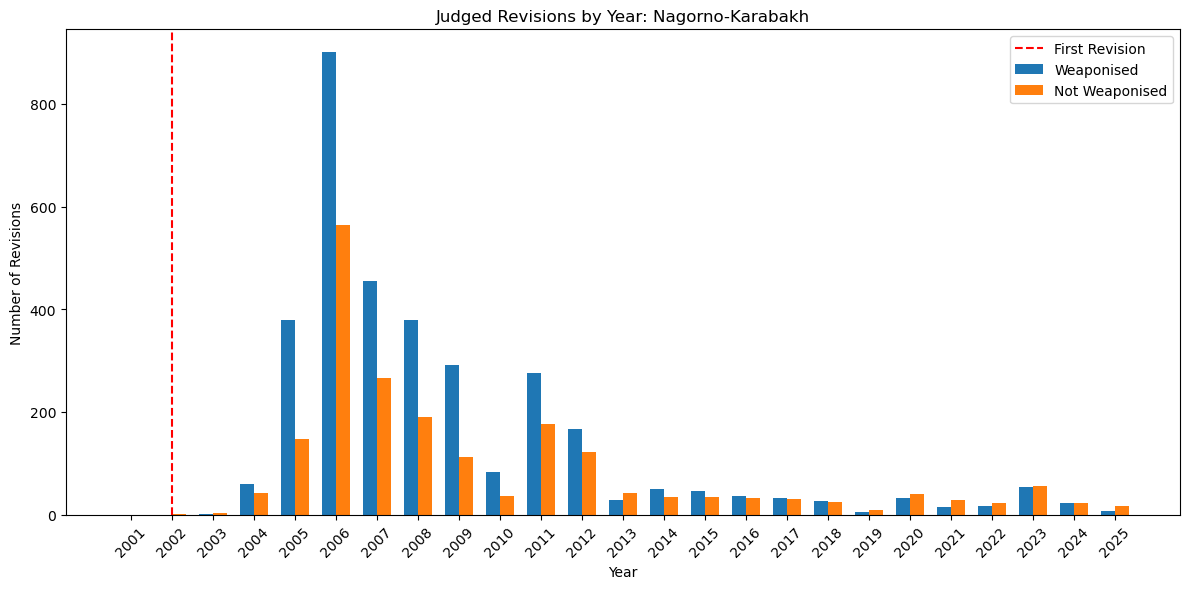

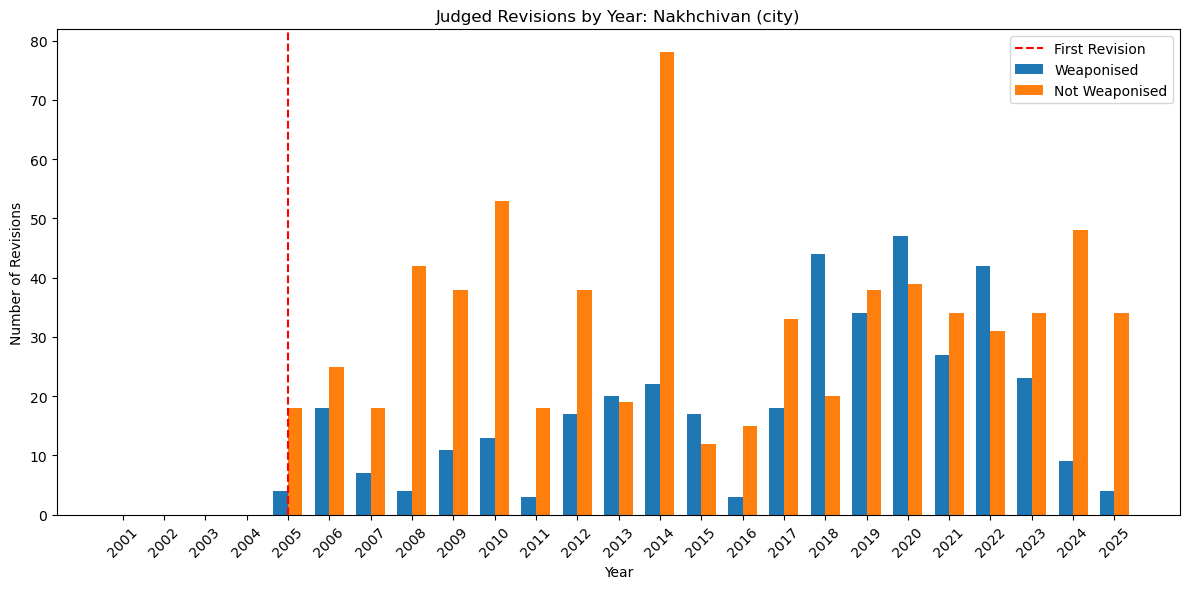

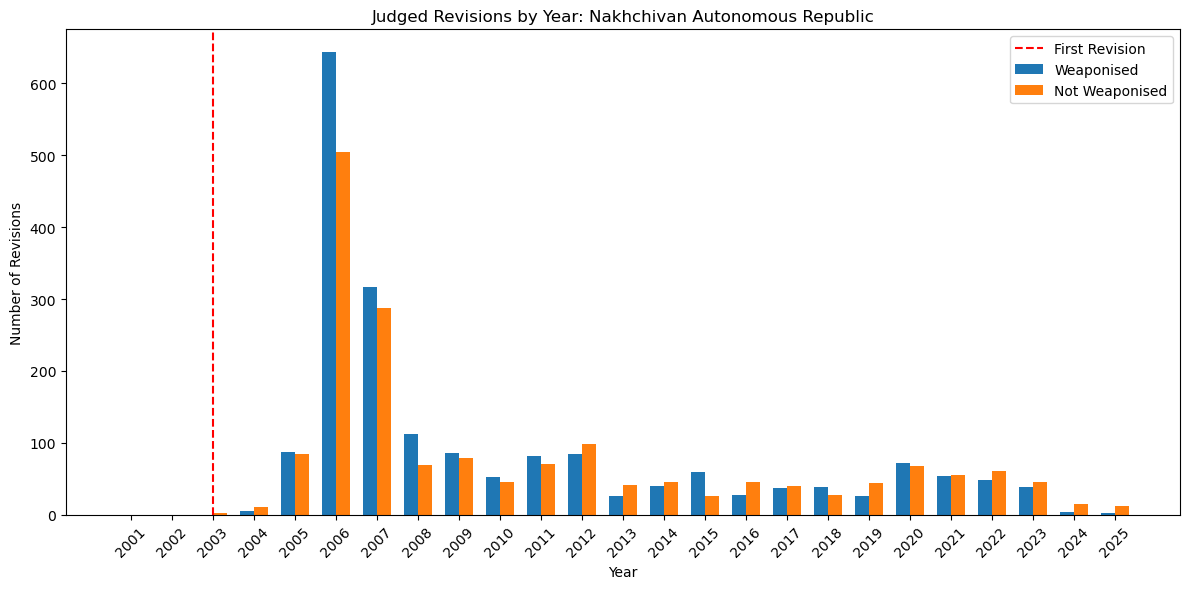

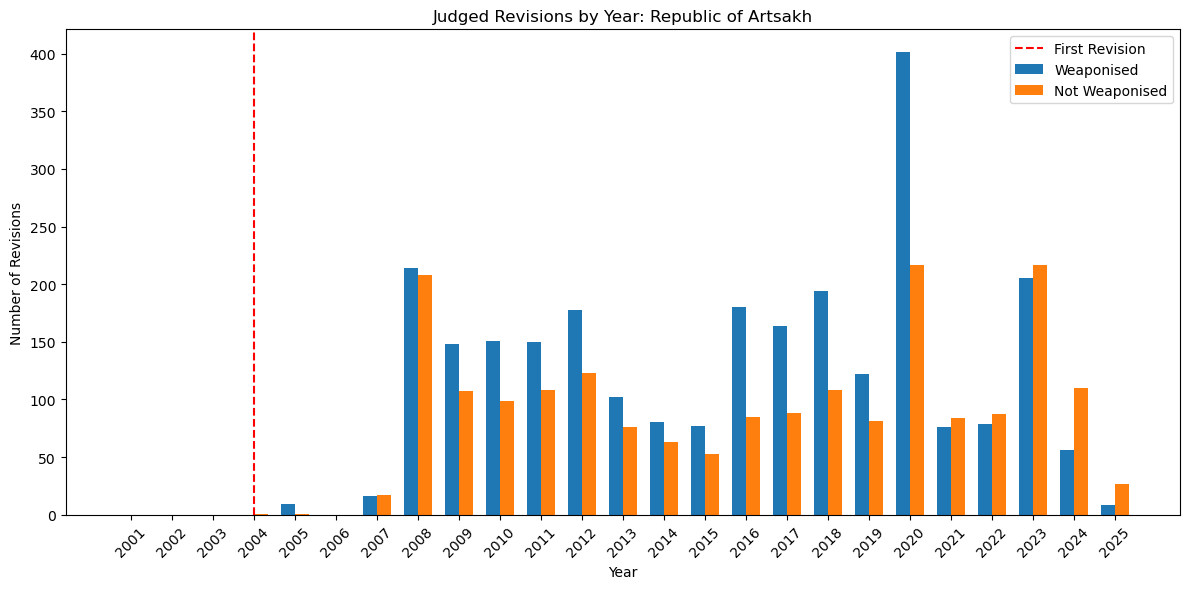

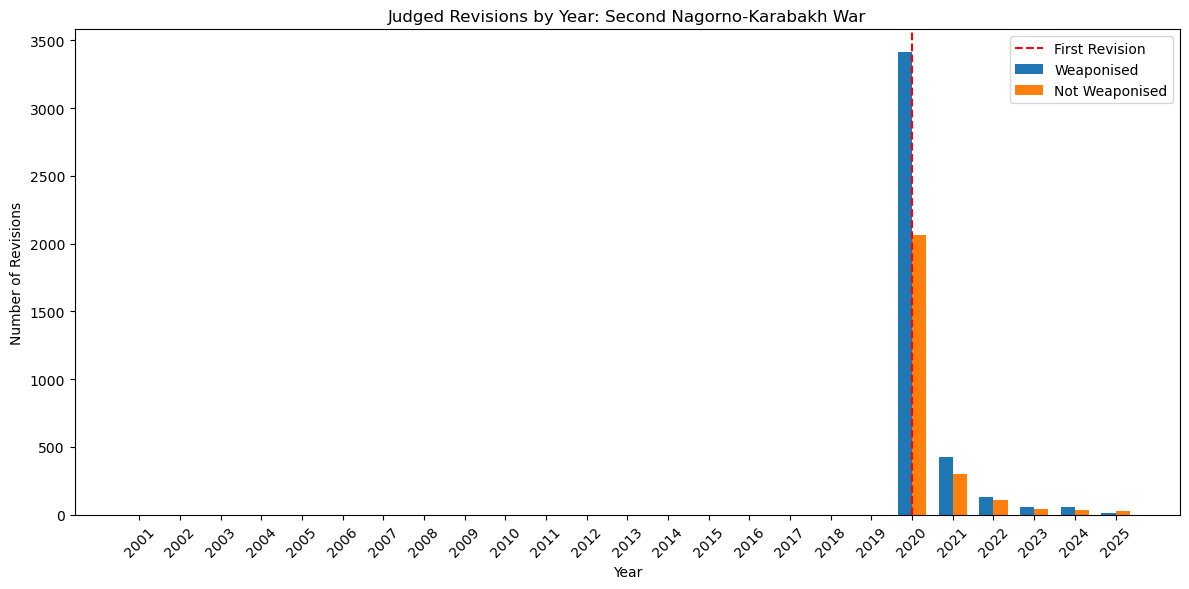

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

input_dir = "../csv_files"
all_years = list(range(2001, 2026))

for file_name in os.listdir(input_dir):
    if not file_name.endswith(".csv"):
        continue

    file_path = os.path.join(input_dir, file_name)
    df = pd.read_csv(file_path, encoding="utf-8")

    if not {"Timestamp", "Judgment", "Source"}.issubset(df.columns):
        print(f"Skipping {file_name}: missing required columns.")
        continue

    df["Year"] = pd.to_datetime(df["Timestamp"], errors="coerce").dt.year
    df = df.dropna(subset=["Year", "Judgment", "Source"])

    source_name = df["Source"].iloc[0].split("/")[-1].split("_")[0]

    # Count judgments by year
    data = defaultdict(lambda: {"Weaponised": 0, "Not Weaponised": 0})
    for _, row in df.iterrows():
        year = int(row["Year"])
        judgment = row["Judgment"].strip().title()
        if judgment in ["Weaponised", "Not Weaponised"]:
            data[year][judgment] += 1

    # Fill counts for all years in uniform order
    weaponised_counts = [data[y]["Weaponised"] for y in all_years]
    not_weaponised_counts = [data[y]["Not Weaponised"] for y in all_years]

    bar_width = 0.35
    x = range(len(all_years))

    plt.figure(figsize=(12, 6))
    plt.bar(x, weaponised_counts, width=bar_width, label="Weaponised")
    plt.bar([i + bar_width for i in x], not_weaponised_counts, width=bar_width, label="Not Weaponised")

    # Add red vertical line for first revision year
    if not df["Year"].empty:
        first_year = int(df["Year"].min())
        if first_year in all_years:
            red_line_index = all_years.index(first_year)
            plt.axvline(x=red_line_index + bar_width / 2, color='red', linestyle='--', label='First Revision')

    plt.xlabel("Year")
    plt.ylabel("Number of Revisions")
    plt.title(f"Judged Revisions by Year: {source_name}")
    plt.xticks([i + bar_width / 2 for i in x], all_years, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
# Suspicious IP-like Usernames Detection and Extraction across all JSONL Files

import os
import json
import re

# Directory containing JSONL files
directory = "../revisions_new"

# Output file to collect suspicious records
output_path = "../other_outputs/suspicious_users_full.jsonl"

# Regex to detect IP-like usernames (IPv4)
ip_like_user_regex = re.compile(r'^\d{1,3}(?:\.\d{1,3}){3}$')

# Counters
total = 0
suspicious_count = 0

with open(output_path, 'w', encoding='utf-8') as outfile:
    for filename in os.listdir(directory):
        #print(filename)
        if filename.endswith(".jsonl"):
            filepath = os.path.join(directory, filename)
            total += 1 # Initial version of the article is still counted
            with open(filepath, 'r', encoding='utf-8') as infile:
                for line in infile:
                    try:
                        record = {"Source": filename.split("_")[0]}
                        record.update(json.loads(line))
                        #record["Source"] = filename.split("_")[0]  # Add source field
                        user = record.get("User")
                        if user:
                            total += 1
                            if ip_like_user_regex.match(user):
                                suspicious_count += 1
                                outfile.write(json.dumps(record, ensure_ascii=False) + "\n")
                    except json.JSONDecodeError:
                        continue  # Skip malformed lines

print(f"Total records: {total}")
print(f"Suspicious IP-like usernames found: {suspicious_count}")
print(f"Suspicious records written to: {output_path}")


Total records: 246825
Suspicious IP-like usernames found: 39421
Suspicious records written to: ../other_outputs/suspicious_users_full.jsonl


In [3]:
# partial analysis for the sample documents alone

import os
import json
import re

# Directory containing JSONL files
directory = "../enriched_demo"

# Output file to collect suspicious records
output_path = "../other_outputs/suspicious_users.jsonl"

# Regex to detect IP-like usernames (IPv4)
ip_like_user_regex = re.compile(r'^\d{1,3}(?:\.\d{1,3}){3}$')

# Counters
total = 0
suspicious_count = 0

with open(output_path, 'w', encoding='utf-8') as outfile:
    for filename in os.listdir(directory):
        #print(filename)
        if filename.endswith(".jsonl"):
            filepath = os.path.join(directory, filename)
            total += 1 # Initial version of the article is still counted
            with open(filepath, 'r', encoding='utf-8') as infile:
                for line in infile:
                    try:
                        record = {"Source": filename.split("_")[0]}
                        record.update(json.loads(line))
                        #record["Source"] = filename.split("_")[0]  # Add source field
                        user = record.get("User")
                        if user:
                            total += 1
                            if ip_like_user_regex.match(user):
                                suspicious_count += 1
                                outfile.write(json.dumps(record, ensure_ascii=False) + "\n")
                    except json.JSONDecodeError:
                        continue  # Skip malformed lines

print(f"Total records: {total}")
print(f"Suspicious IP-like usernames found: {suspicious_count}")
print(f"Suspicious records written to: {output_path}")


Total records: 54565
Suspicious IP-like usernames found: 8359
Suspicious records written to: ../other_outputs/suspicious_users.jsonl


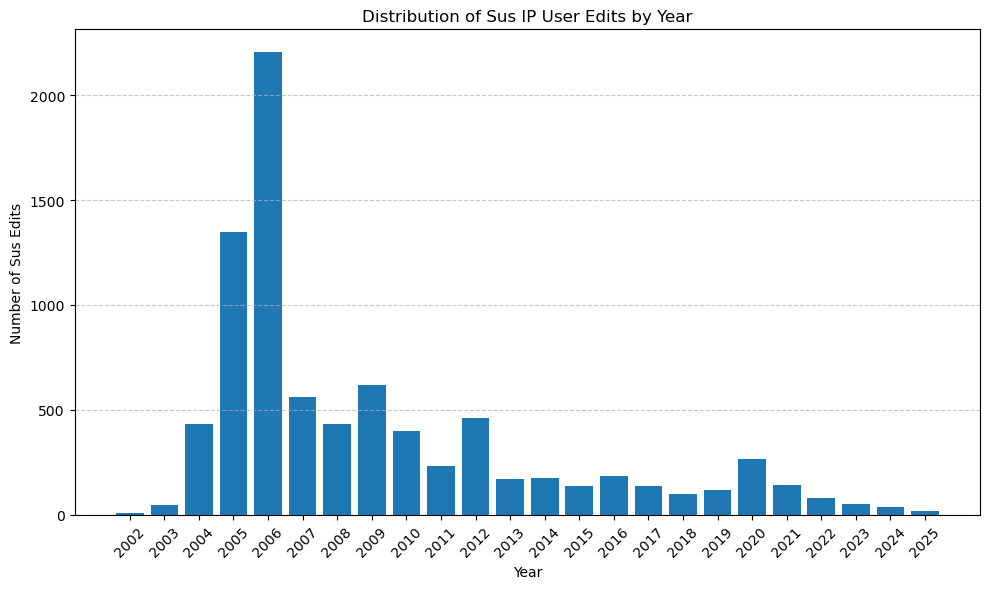

In [4]:
import json
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt

# Path to the new filtered .jsonl file with sus IP usernames
jsonl_path = "../other_outputs/suspicious_users.jsonl"

# Counter for year frequencies
year_counter = Counter()

# Read and count
with open(jsonl_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            record = json.loads(line)
            timestamp_str = record.get("Timestamp", "")
            if timestamp_str:
                dt = datetime.strptime(timestamp_str, "%Y-%m-%dT%H:%M:%SZ")
                year_counter[dt.year] += 1
        except Exception as e:
            print(f"Skipping line due to error: {e}")

# Sort by year
sorted_years = sorted(year_counter.items())

# Unpack years and counts
years, counts = zip(*sorted_years)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(years, counts)
plt.xlabel("Year")
plt.ylabel("Number of Sus Edits")
plt.title("Distribution of Sus IP User Edits by Year")
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


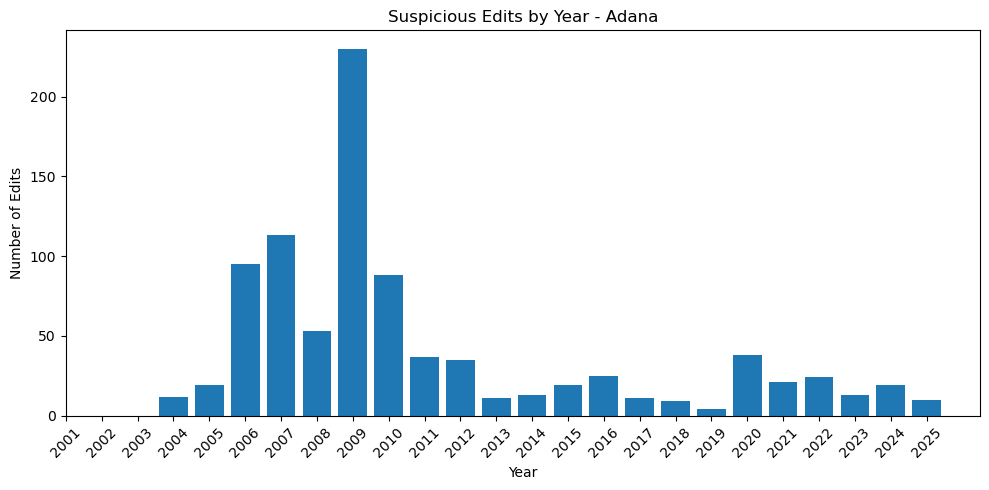

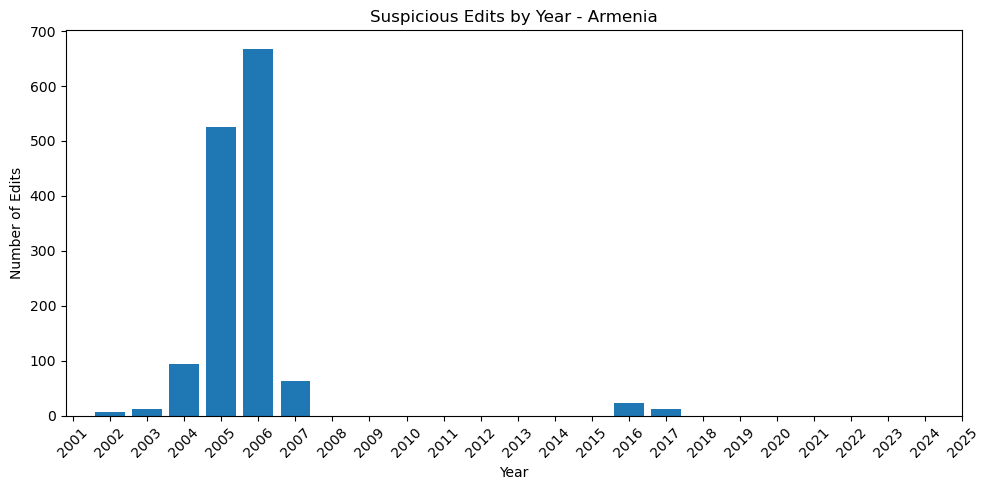

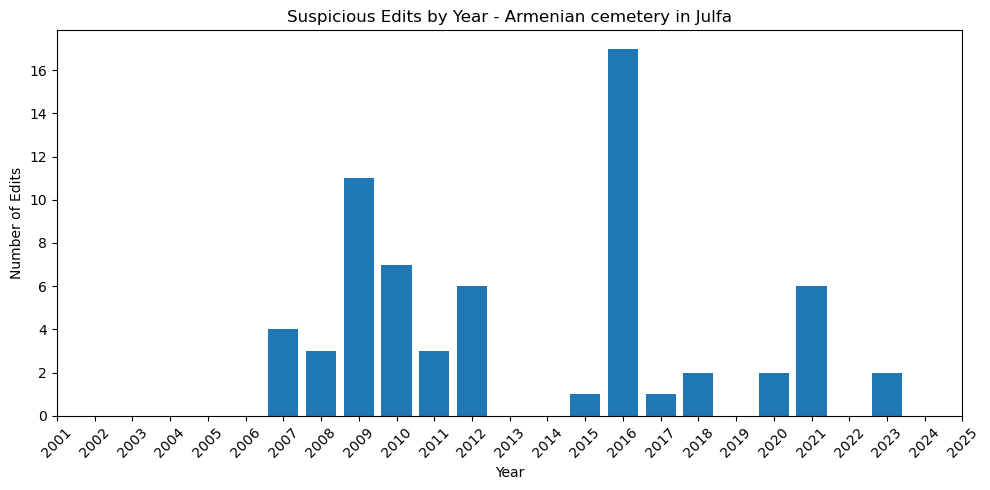

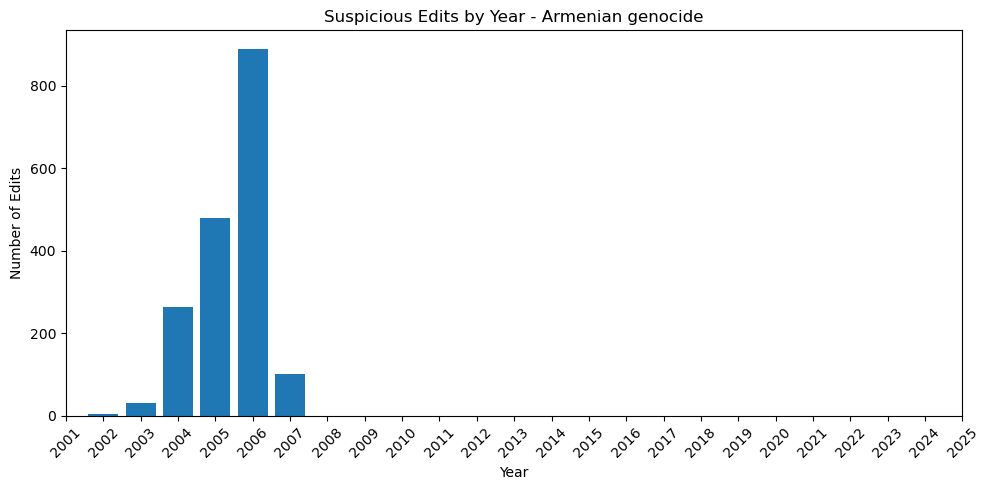

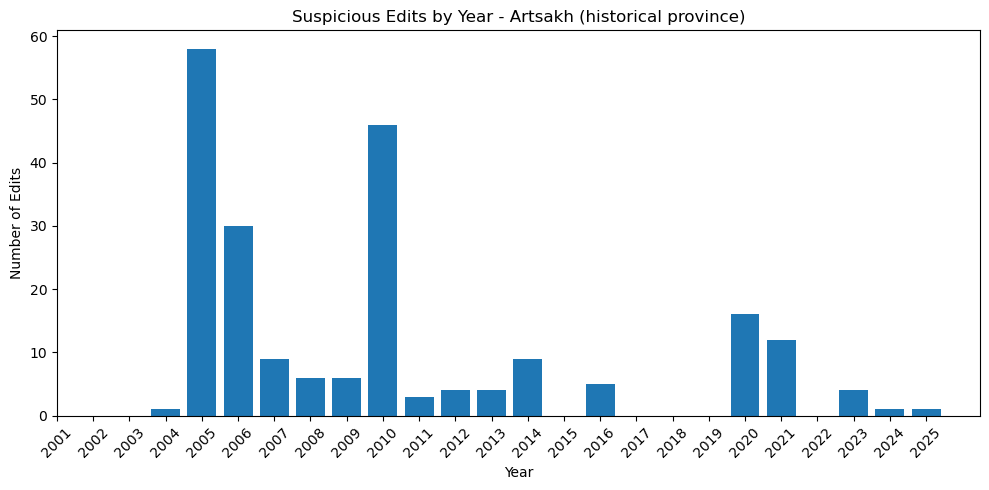

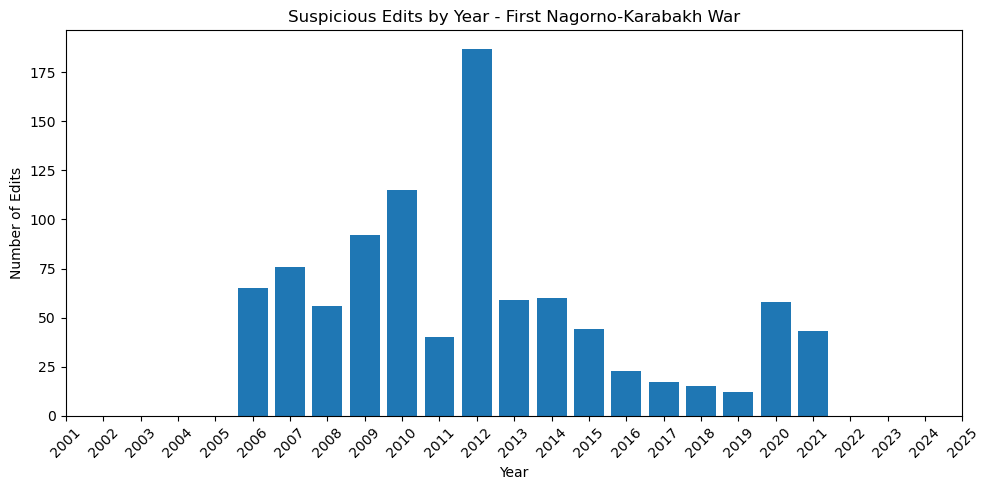

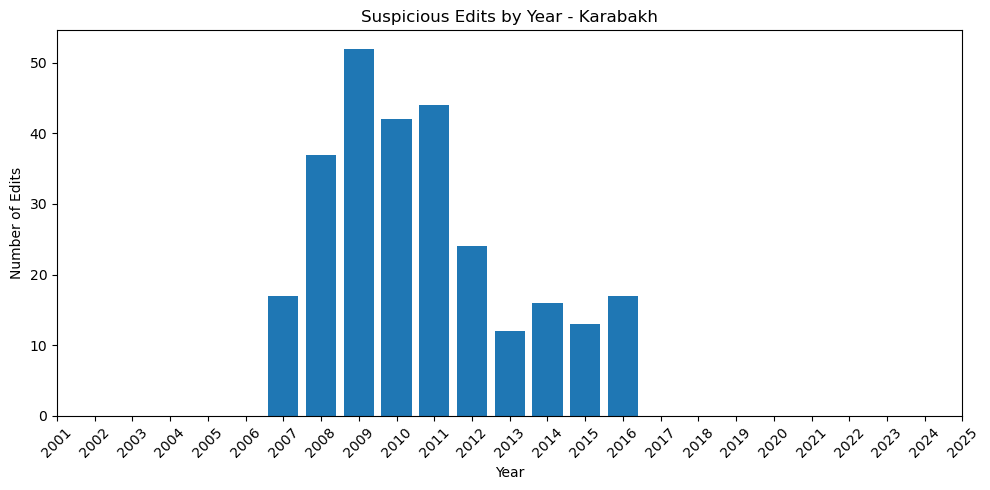

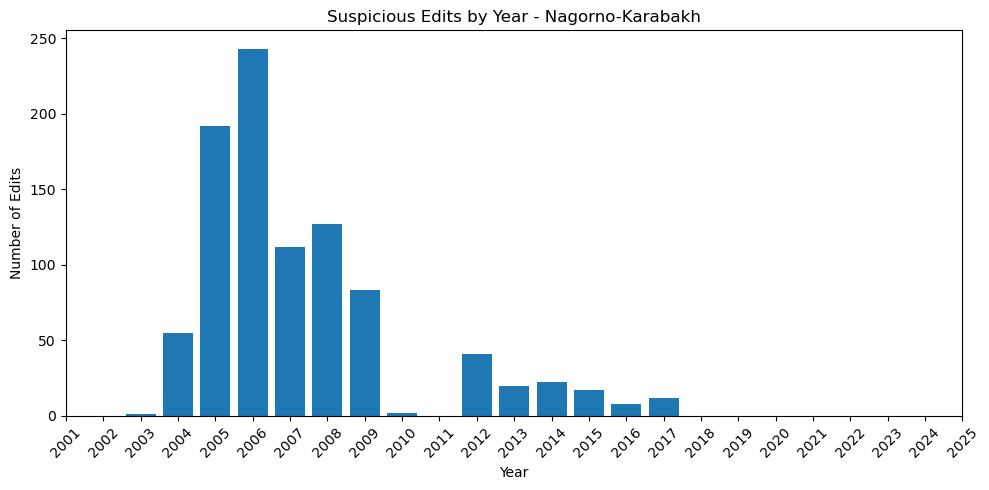

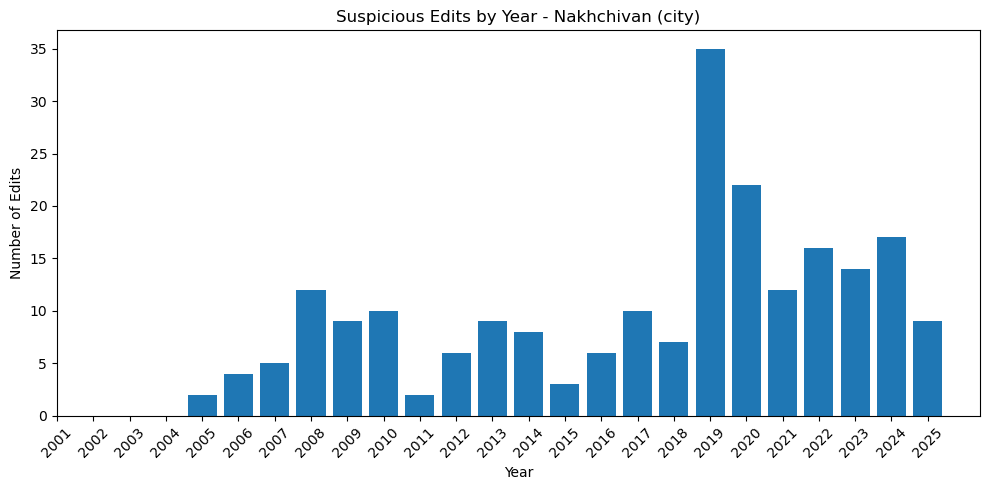

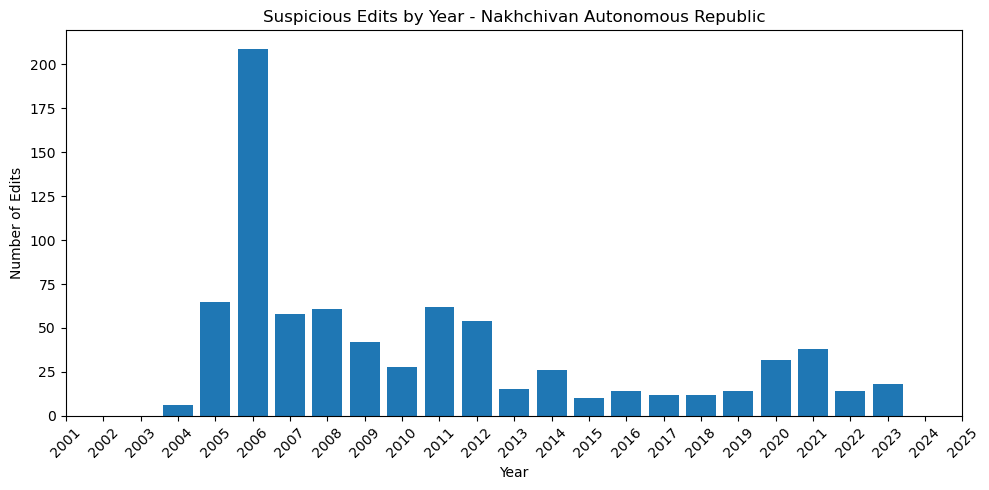

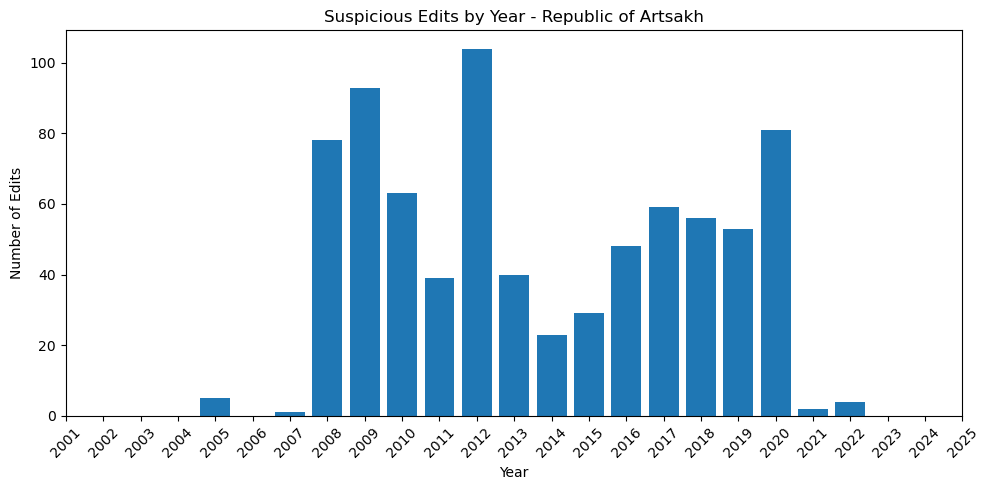

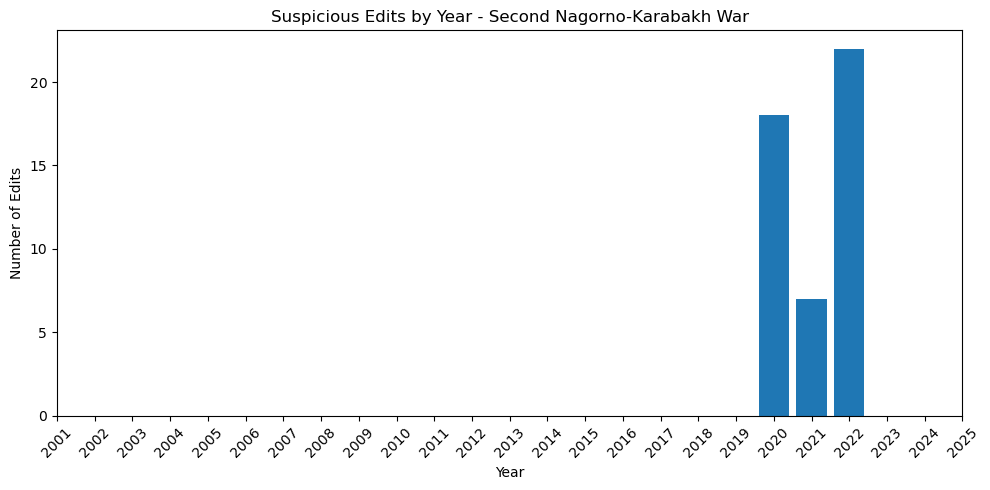

In [ ]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from datetime import datetime

# Path to enriched sus-user .jsonl file
sus_file_path = "../other_outputs/suspicious_users.jsonl"

# Prepare data structure: {source_article: Counter({year: count})}
source_year_counts = defaultdict(Counter)

# Parse the jsonl file
with open(sus_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            record = json.loads(line)
            timestamp = record.get("Timestamp")
            source = record.get("Source", "Unknown Article")

            if timestamp:
                year = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ").year
                source_year_counts[source][year] += 1

        except Exception as e:
            print(f"Skipping malformed line: {e}")

# Plotting
for source, year_counts in source_year_counts.items():
    years = sorted(year_counts)
    counts = [year_counts[year] for year in years]

    plt.figure(figsize=(10, 5))
    plt.bar(years, counts)
    plt.title(f"Suspicious Edits by Year - {source}")
    plt.xlabel("Year")
    plt.ylabel("Number of Edits")
    plt.xticks(range(2001, 2026), rotation=45)
    plt.tight_layout()
    plt.show()


Suspicious user entries saved to ../other_outputs/suspicious_users_combined.csv


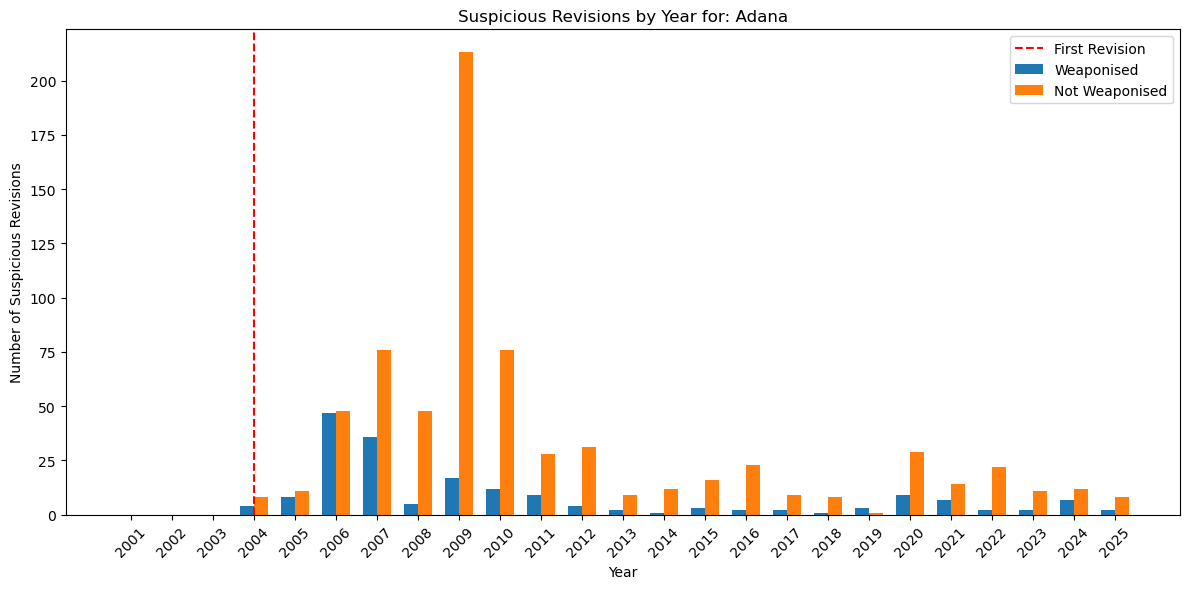

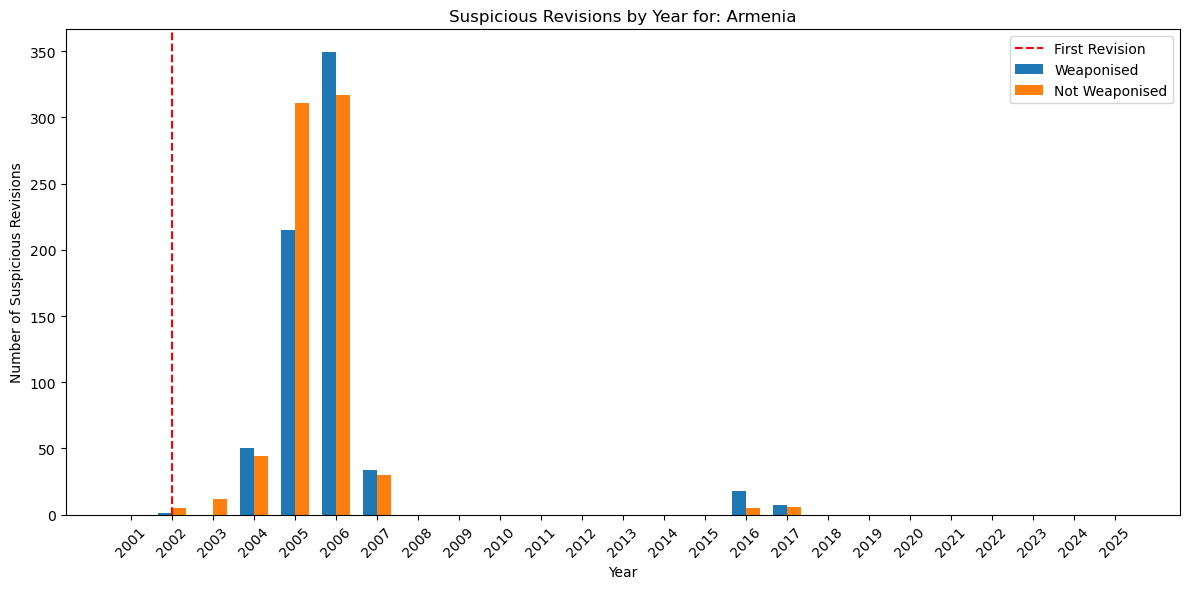

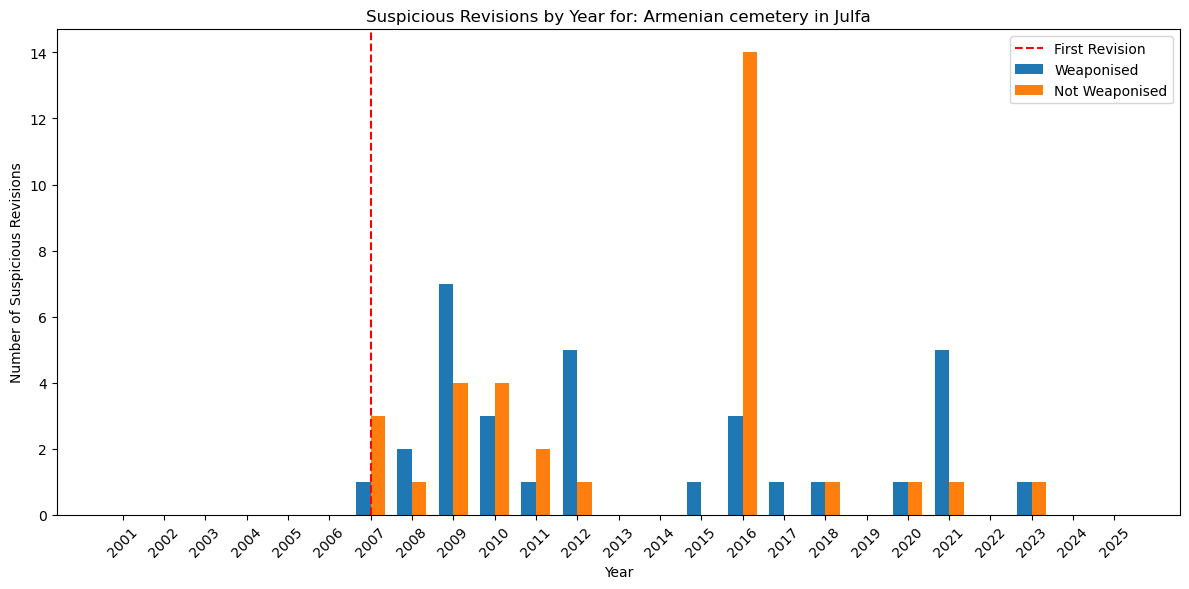

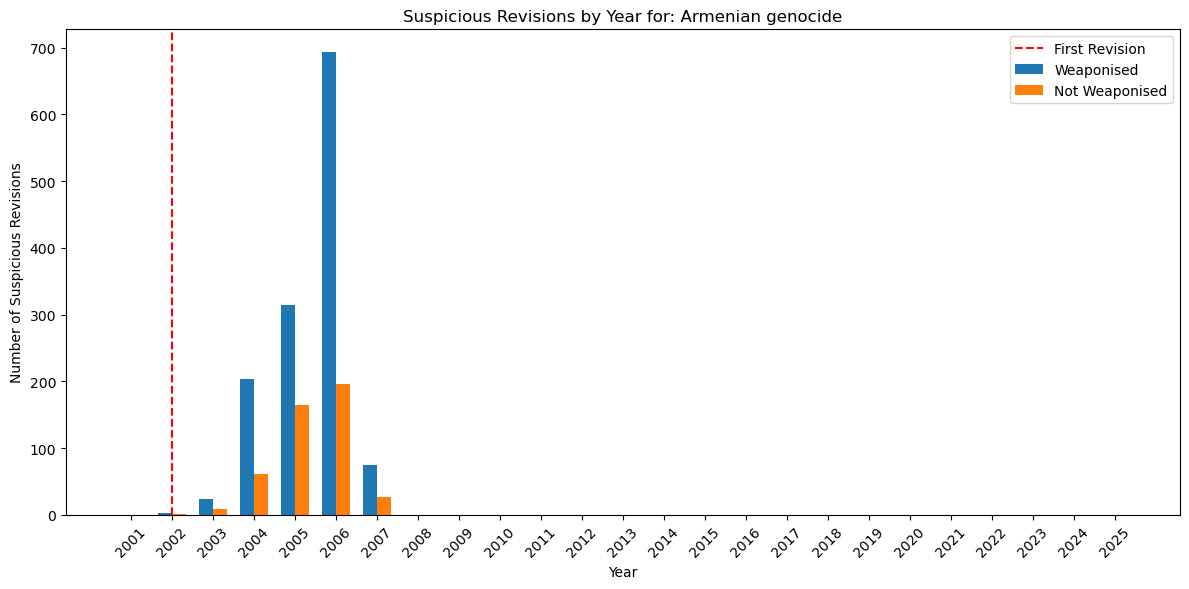

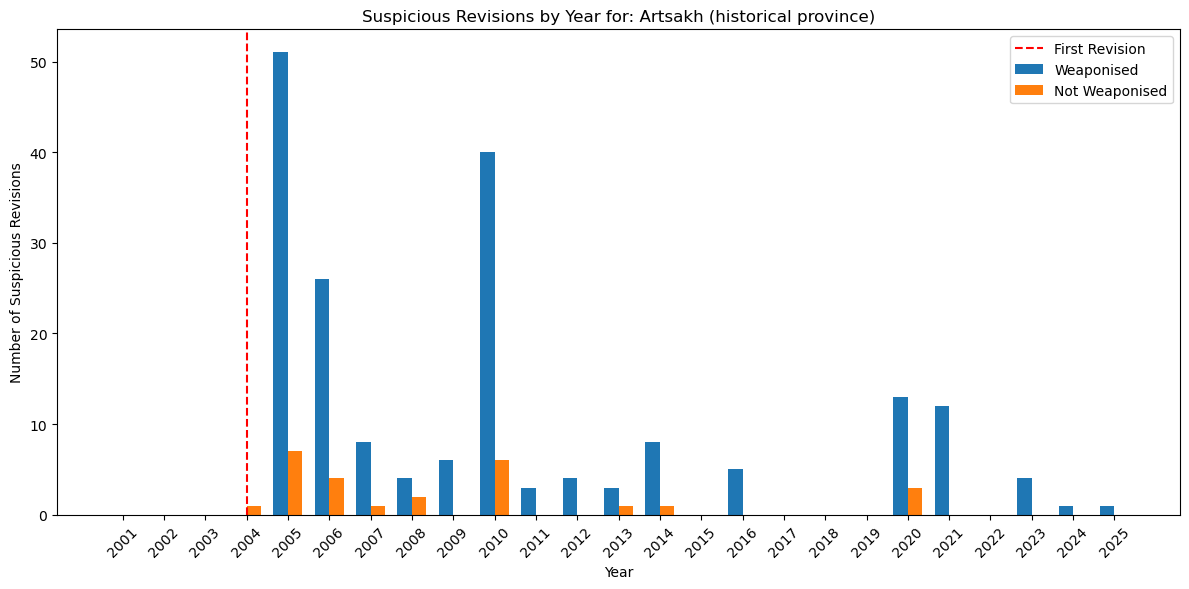

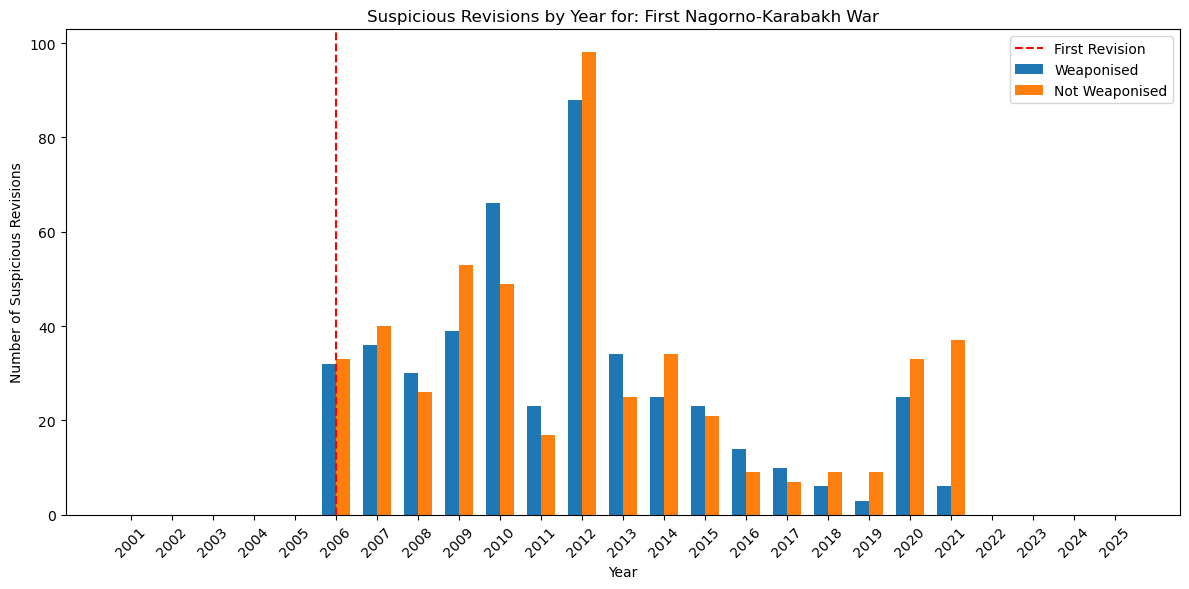

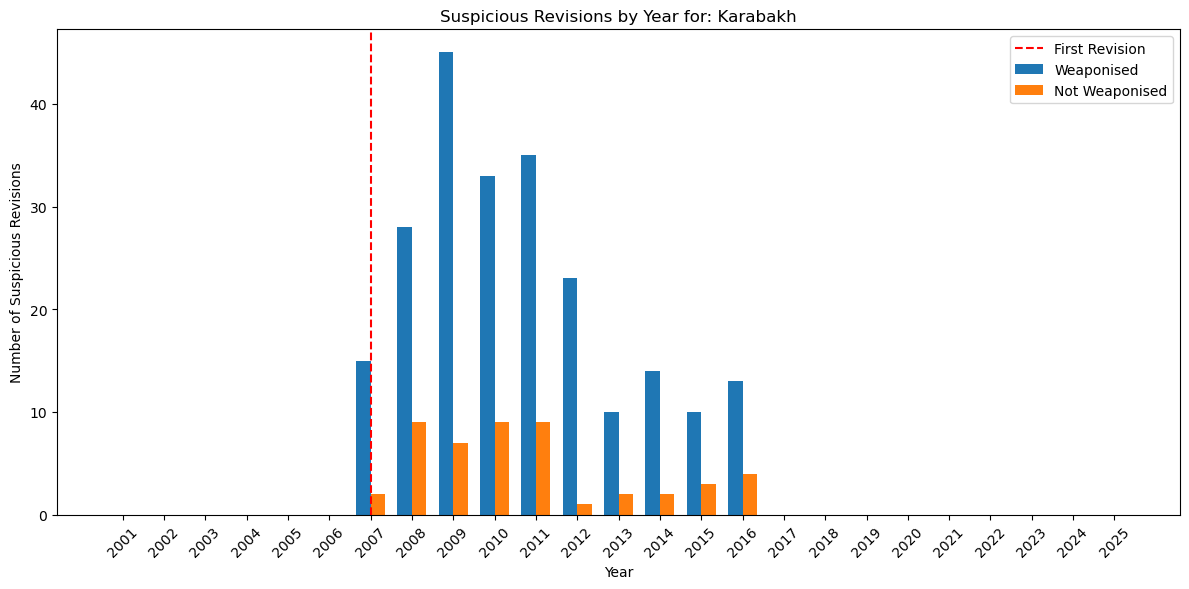

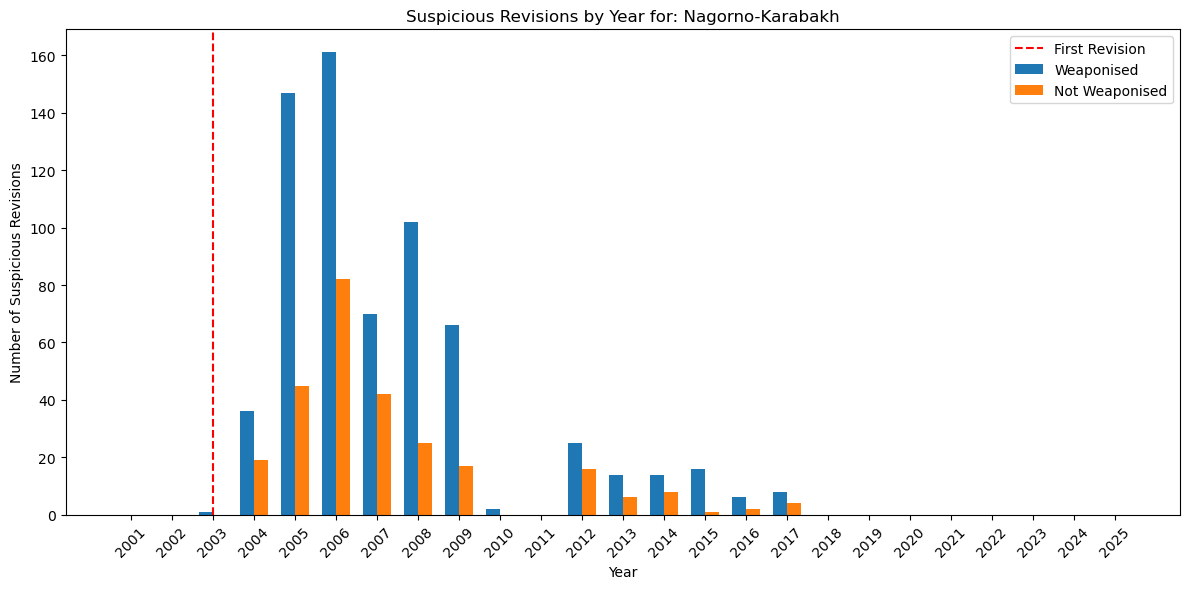

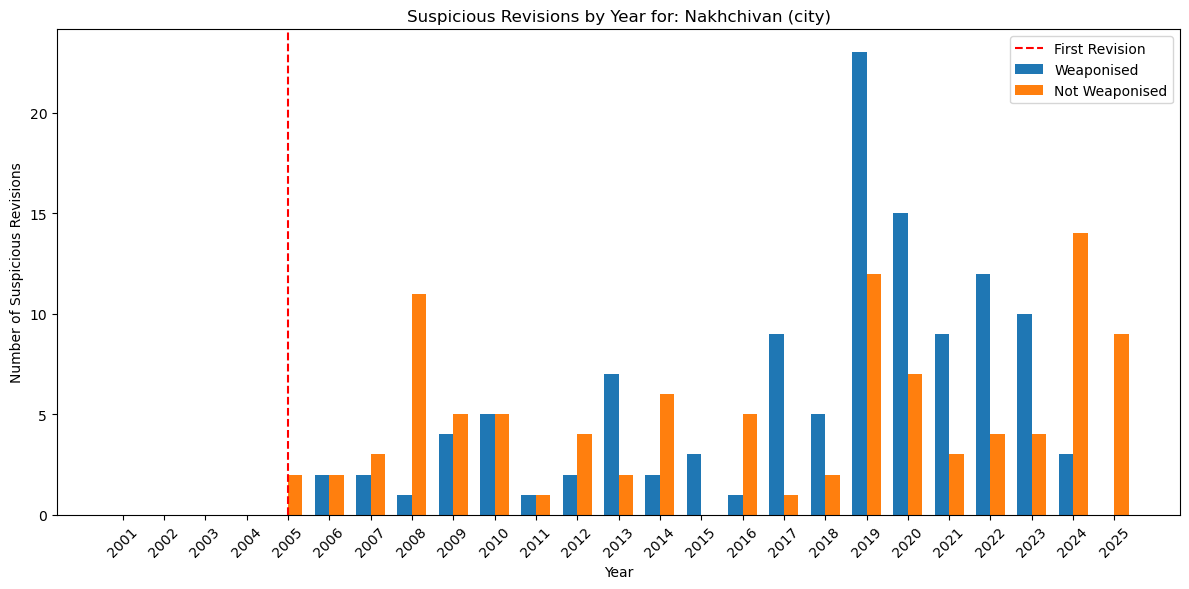

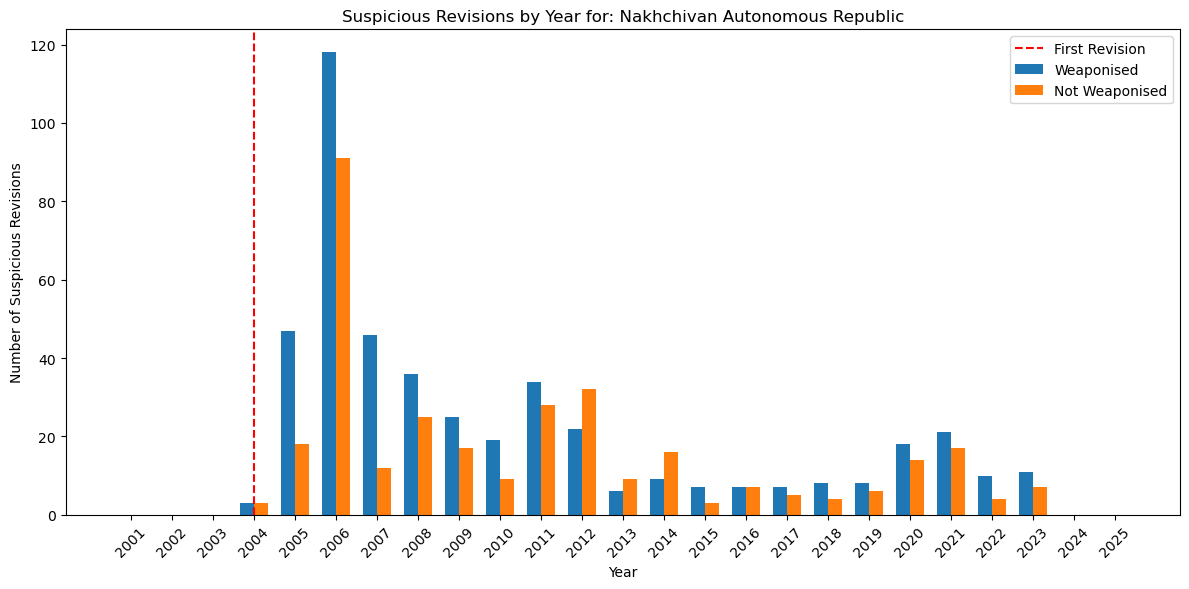

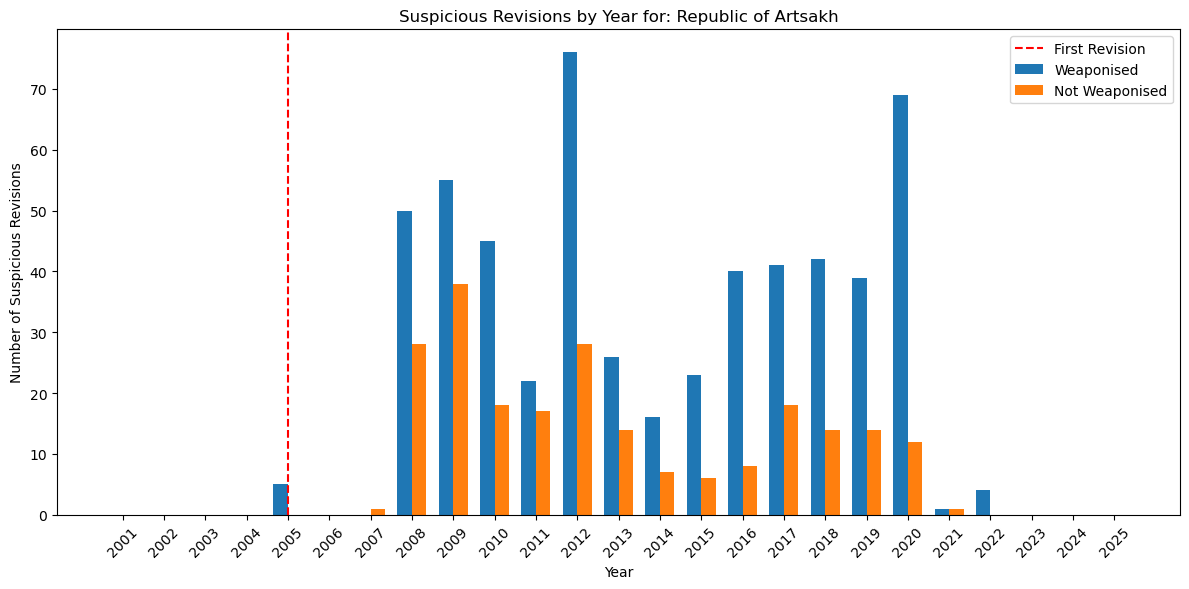

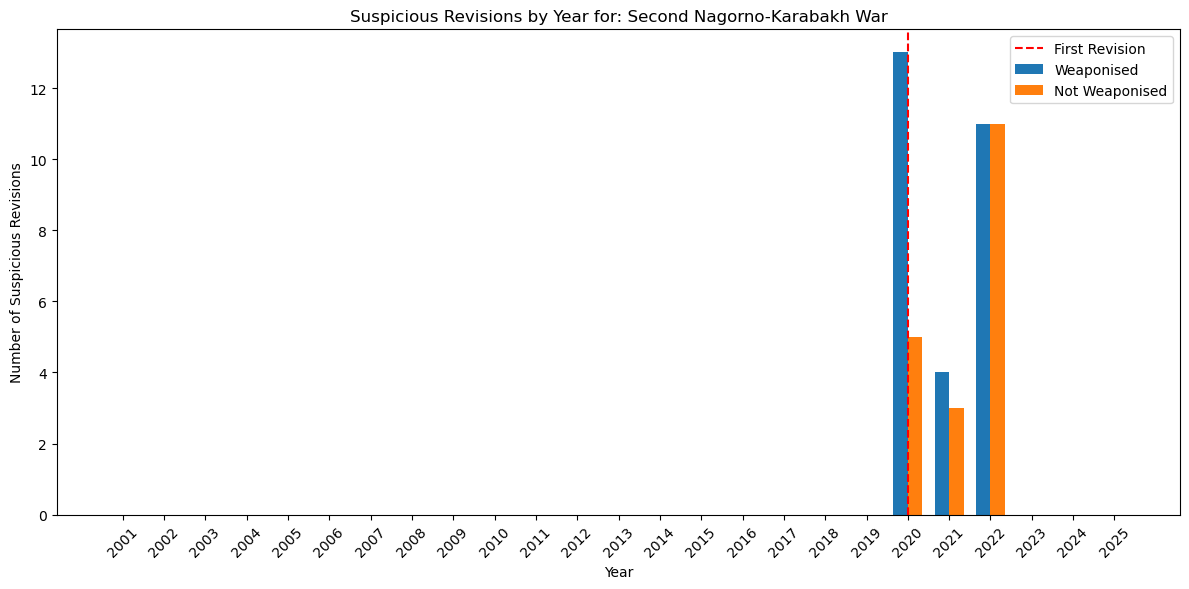

In [2]:
# csv version


import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# -------------------------------
# Configuration
# -------------------------------
input_dir = "../csv_files"
output_file = "../other_outputs/suspicious_users_combined.csv"

# -------------------------------
# Helper: Check if string is an IP address
# -------------------------------
def is_suspicious_user(user):
    return bool(re.match(r"^\d{1,3}(\.\d{1,3}){3}$", str(user)))

# -------------------------------
# Step 1: Load all CSV files and collect suspicious user rows
# -------------------------------
all_suspicious_rows = []

for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path, encoding="utf-8")
        suspicious_rows = df[df["User"].apply(is_suspicious_user)].copy()
        if not suspicious_rows.empty:
            all_suspicious_rows.append(suspicious_rows)


# Combine all suspicious rows into one DataFrame and save
if all_suspicious_rows:
    combined_df = pd.concat(all_suspicious_rows, ignore_index=True)
    combined_df.to_csv(output_file, index=False, encoding="utf-8")
    print(f"Suspicious user entries saved to {output_file}")
else:
    print("No suspicious users found.")

# -------------------------------
# Step 2: Plot bar chart of year counts split by judgment, per article
# -------------------------------
# Add a new column for Year
combined_df["Year"] = pd.to_datetime(combined_df["Timestamp"], errors='coerce').dt.year
combined_df = combined_df.dropna(subset=["Year", "Source", "Judgment"])  # Drop bad timestamps or missing data

# Group data: {source: {year: {"Weaponised": x, "Not Weaponised": y}}}
data = defaultdict(lambda: defaultdict(lambda: {"Weaponised": 0, "Not Weaponised": 0}))

for _, row in combined_df.iterrows():
    src = row["Source"].split("/")[-1].split("_")[0]
    year = int(row["Year"])
    judgment = row["Judgment"].strip().title()
    if judgment in ["Weaponised", "Not Weaponised"]:
        data[src][year][judgment] += 1

# Plot per article
for src, year_data in data.items():
    # Fixed range of years
    all_years = list(range(2001, 2026))

    weaponised_counts = [year_data[y]["Weaponised"] if y in year_data else 0 for y in all_years]
    not_weaponised_counts = [year_data[y]["Not Weaponised"] if y in year_data else 0 for y in all_years]

    bar_width = 0.35
    x = range(len(all_years))

    plt.figure(figsize=(12, 6))
    plt.bar(x, weaponised_counts, width=bar_width, label="Weaponised")
    plt.bar([i + bar_width for i in x], not_weaponised_counts, width=bar_width, label="Not Weaponised")

    # Add red vertical line for first revision year

    first_year = int(min(year_data.keys()))
    if 2001 <= first_year <= 2025:
        red_line_index = all_years.index(first_year)
        plt.axvline(x=red_line_index + bar_width / 2, color='red', linestyle='--', label='First Revision')
    
    plt.xlabel("Year")
    plt.ylabel("Number of Suspicious Revisions")
    plt.title(f"Suspicious Revisions by Year for: {src}")
    plt.xticks([i + bar_width / 2 for i in x], all_years, rotation=45)  # ✅ Rotate ticks
    plt.legend()
    plt.tight_layout()
    plt.show()


In [1]:
# csv version


import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# -------------------------------
# Configuration
# -------------------------------
output_file = "../other_outputs/suspicious_users_combined.csv"

combined_df = pd.read_csv(output_file, encoding="utf-8")

# Prepare structure: {source: {year: {"weaponized_count": x, "unique_users": set()}}}
user_contrib_data = defaultdict(lambda: defaultdict(lambda: {"weaponized_count": 0, "unique_users": set()}))

# -------------------------------
# Step 2: Plot bar chart of year counts split by judgment, per article
# -------------------------------
# Add a new column for Year
combined_df["Year"] = pd.to_datetime(combined_df["Timestamp"], errors='coerce').dt.year
combined_df = combined_df.dropna(subset=["Year", "Source", "Judgment"])  # Drop bad timestamps or missing data

# Group data: {source: {year: {"Weaponised": x, "Not Weaponised": y}}}
data = defaultdict(lambda: defaultdict(lambda: {"Weaponised": 0, "Not Weaponised": 0}))

for _, row in combined_df.iterrows():
    src = row["Source"].split("/")[-1].split("_")[0]
    year = int(row["Year"])
    judgment = row["Judgment"].strip().title()
    user = str(row["User"]).strip()

    if judgment == "Weaponised" and user:
        user_contrib_data[src][year]["weaponized_count"] += 1
        user_contrib_data[src][year]["unique_users"].add(user)

# Print summary
for src, year_data in user_contrib_data.items():
    print(f"--- {src} ---")
    for year in sorted(year_data.keys()):
        count = year_data[year]["weaponized_count"]
        unique_users = len(year_data[year]["unique_users"])
        ratio = count / unique_users if unique_users else 0
        print(f"{year}: {count} weaponized edits by {unique_users} users | avg edits/user = {ratio:.2f}")

--- Adana ---
2004: 4 weaponized edits by 2 users | avg edits/user = 2.00
2005: 8 weaponized edits by 7 users | avg edits/user = 1.14
2006: 47 weaponized edits by 24 users | avg edits/user = 1.96
2007: 36 weaponized edits by 32 users | avg edits/user = 1.12
2008: 5 weaponized edits by 5 users | avg edits/user = 1.00
2009: 17 weaponized edits by 11 users | avg edits/user = 1.55
2010: 12 weaponized edits by 8 users | avg edits/user = 1.50
2011: 9 weaponized edits by 7 users | avg edits/user = 1.29
2012: 4 weaponized edits by 4 users | avg edits/user = 1.00
2013: 2 weaponized edits by 2 users | avg edits/user = 1.00
2014: 1 weaponized edits by 1 users | avg edits/user = 1.00
2015: 3 weaponized edits by 3 users | avg edits/user = 1.00
2016: 2 weaponized edits by 2 users | avg edits/user = 1.00
2017: 2 weaponized edits by 2 users | avg edits/user = 1.00
2018: 1 weaponized edits by 1 users | avg edits/user = 1.00
2019: 3 weaponized edits by 3 users | avg edits/user = 1.00
2020: 9 weaponized 

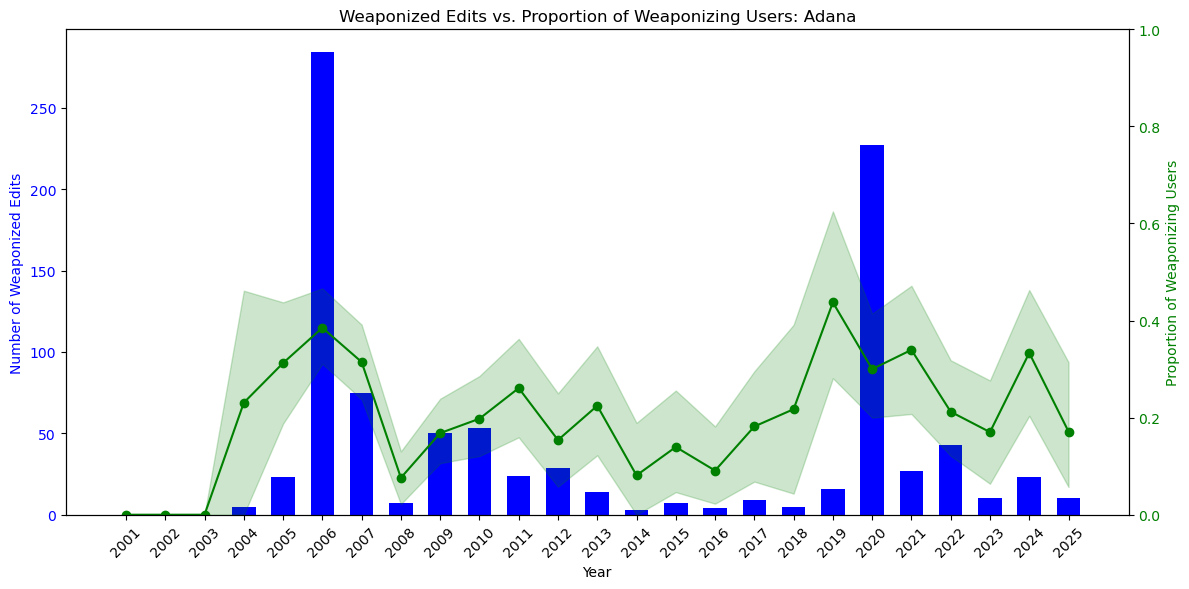

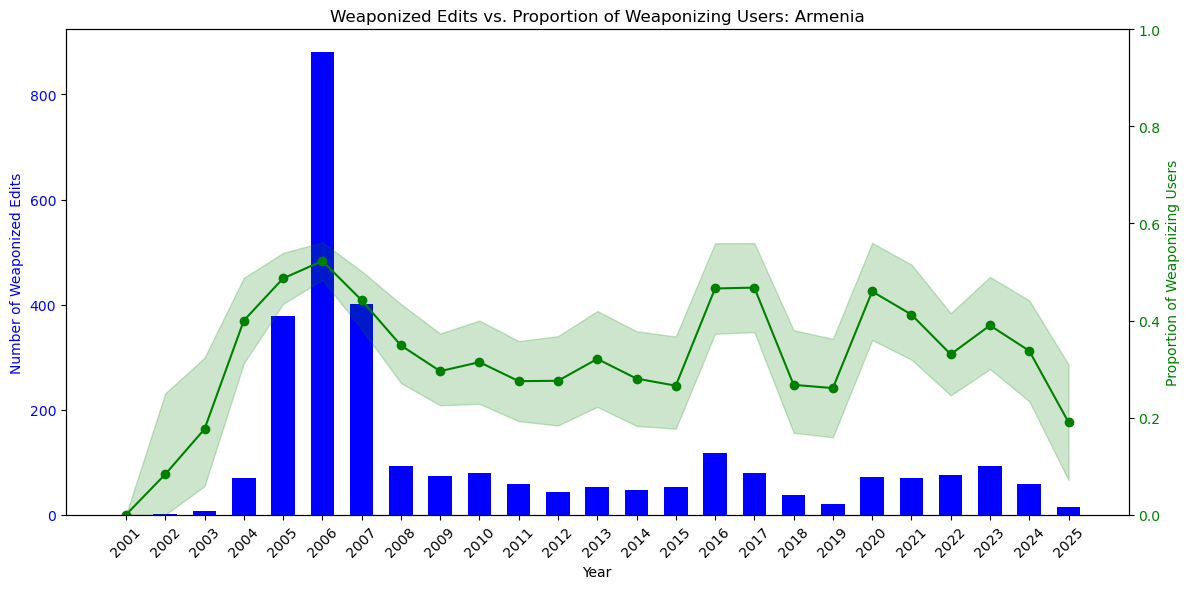

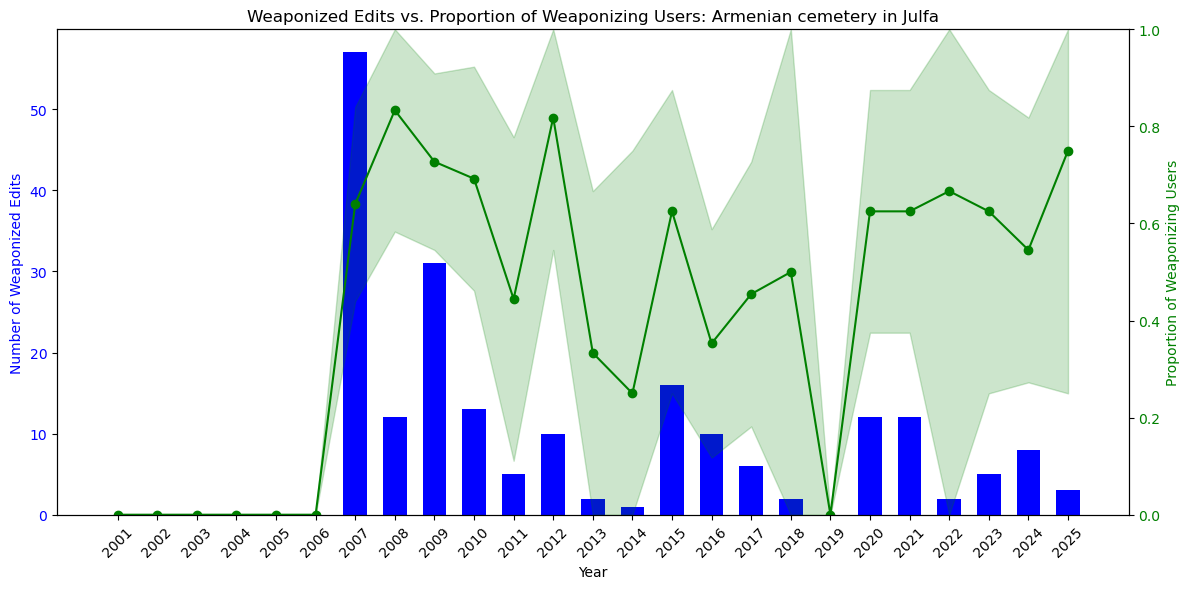

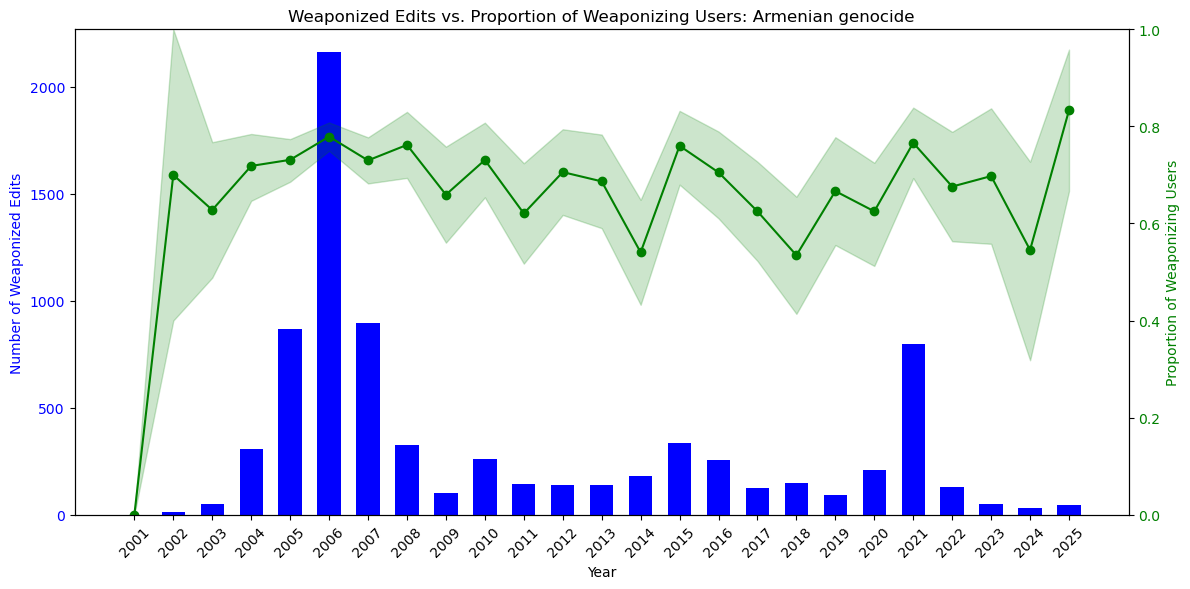

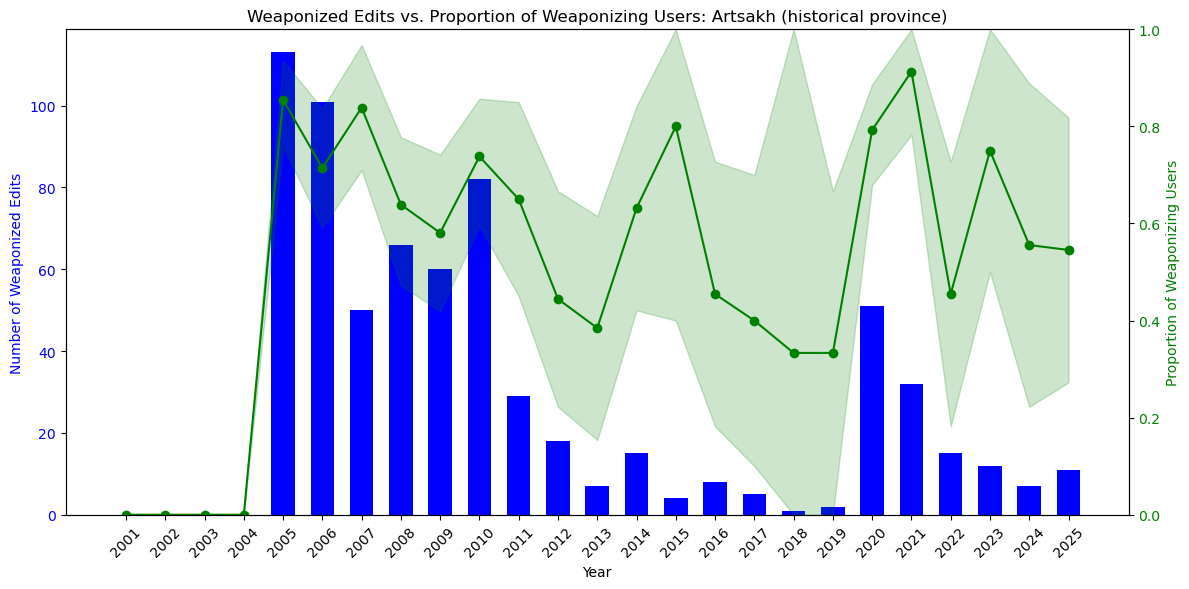

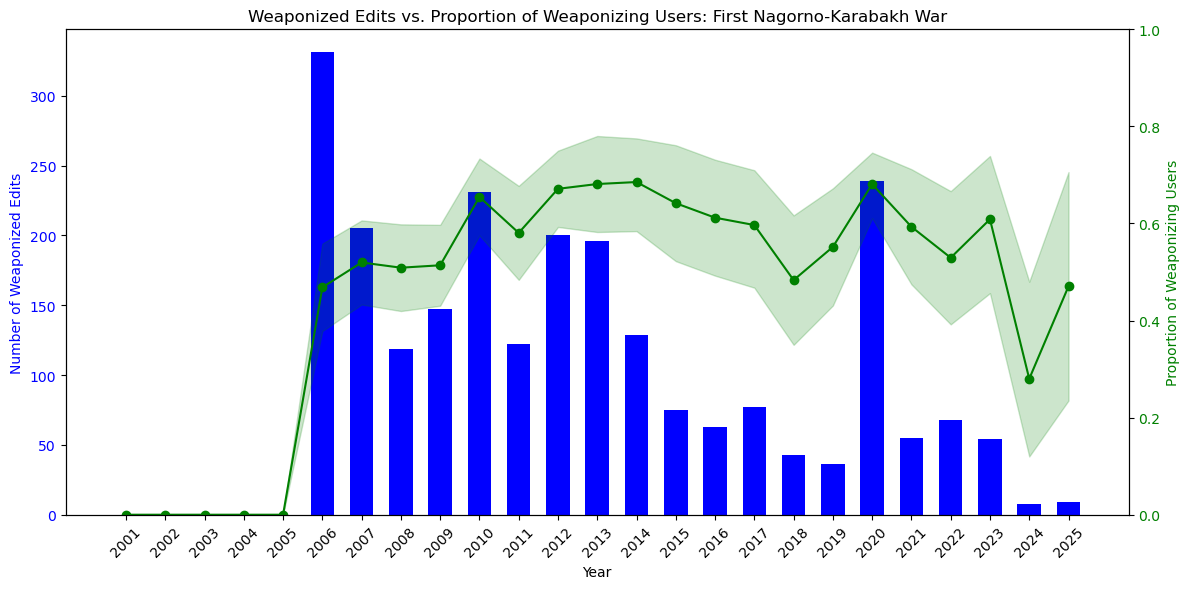

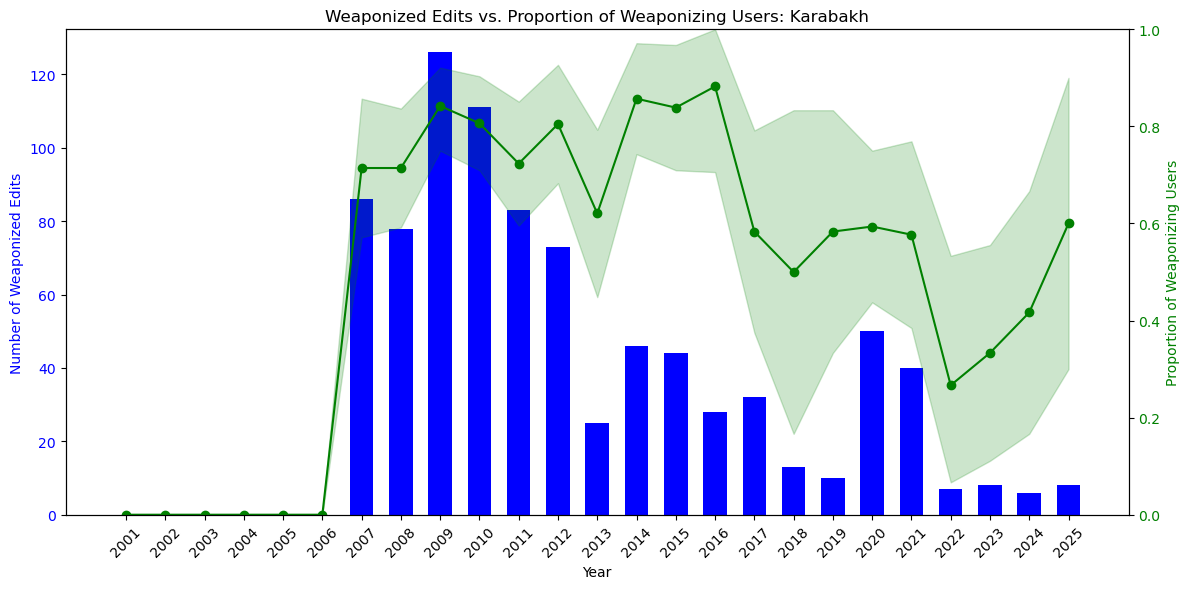

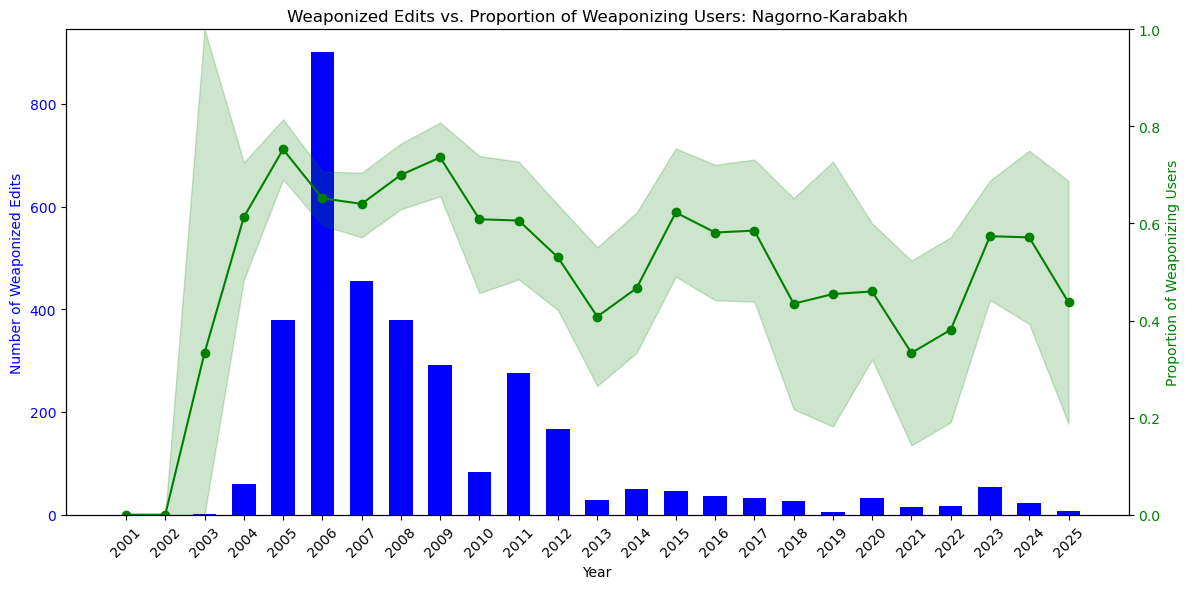

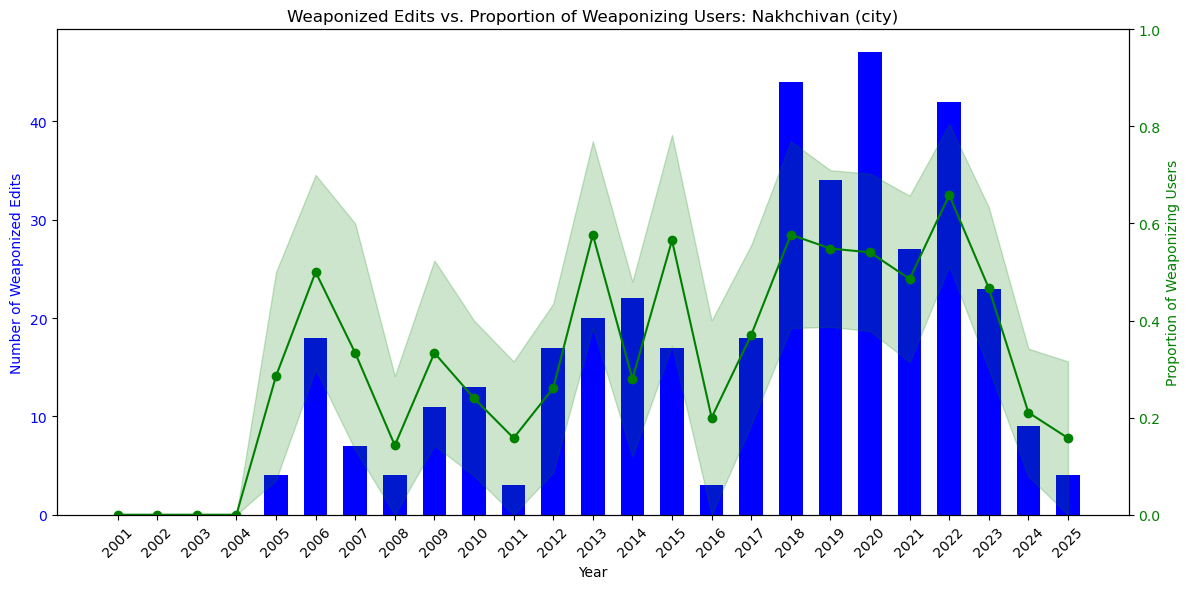

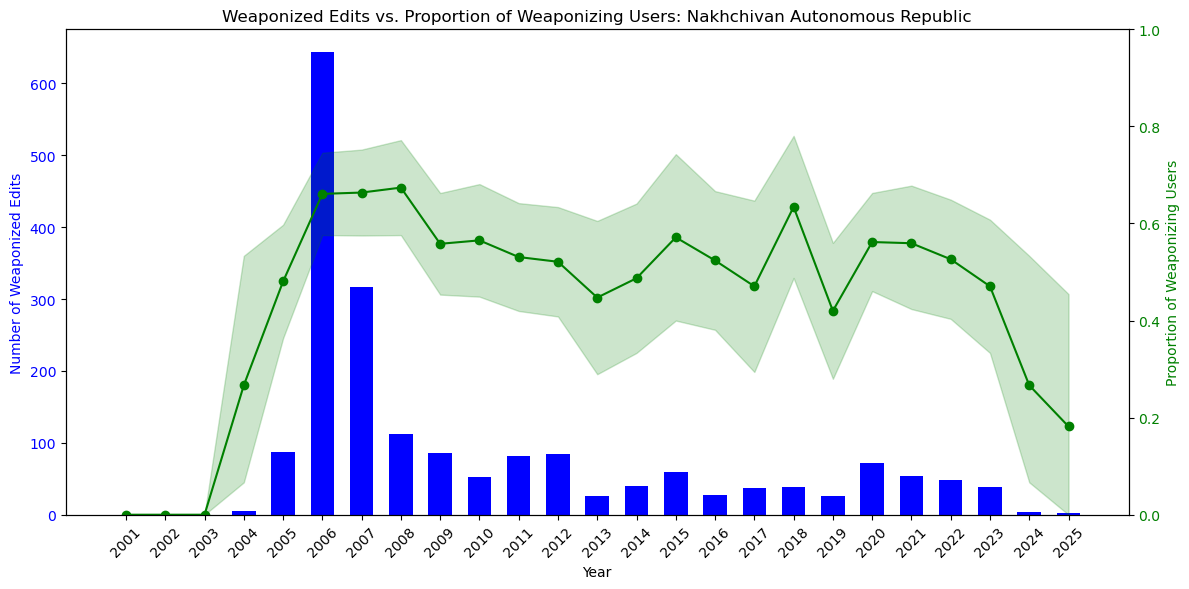

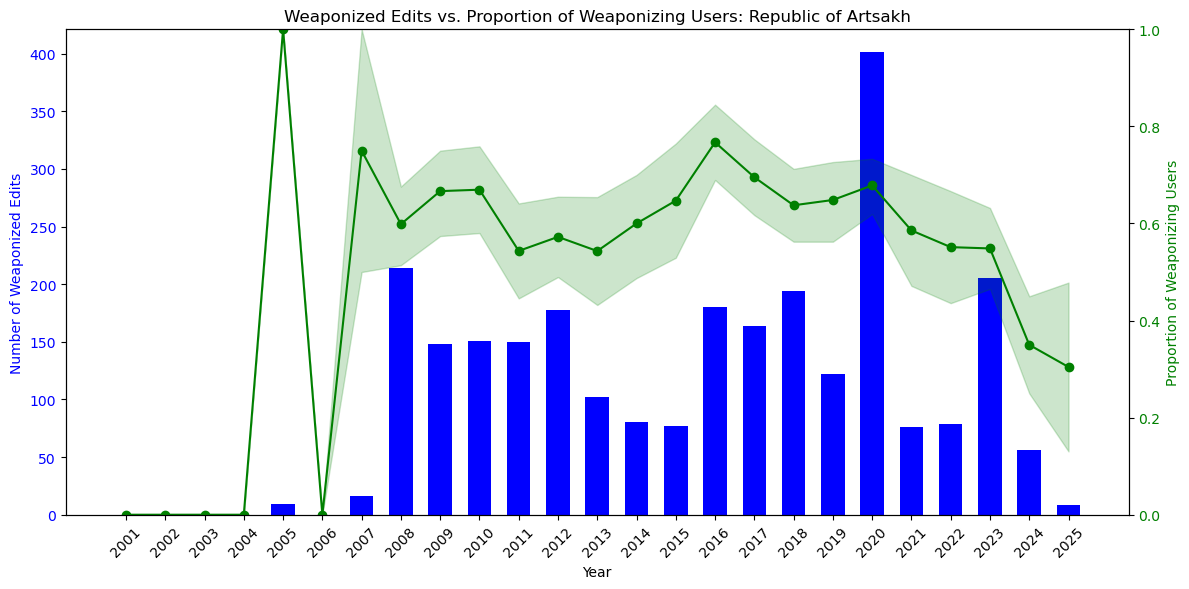

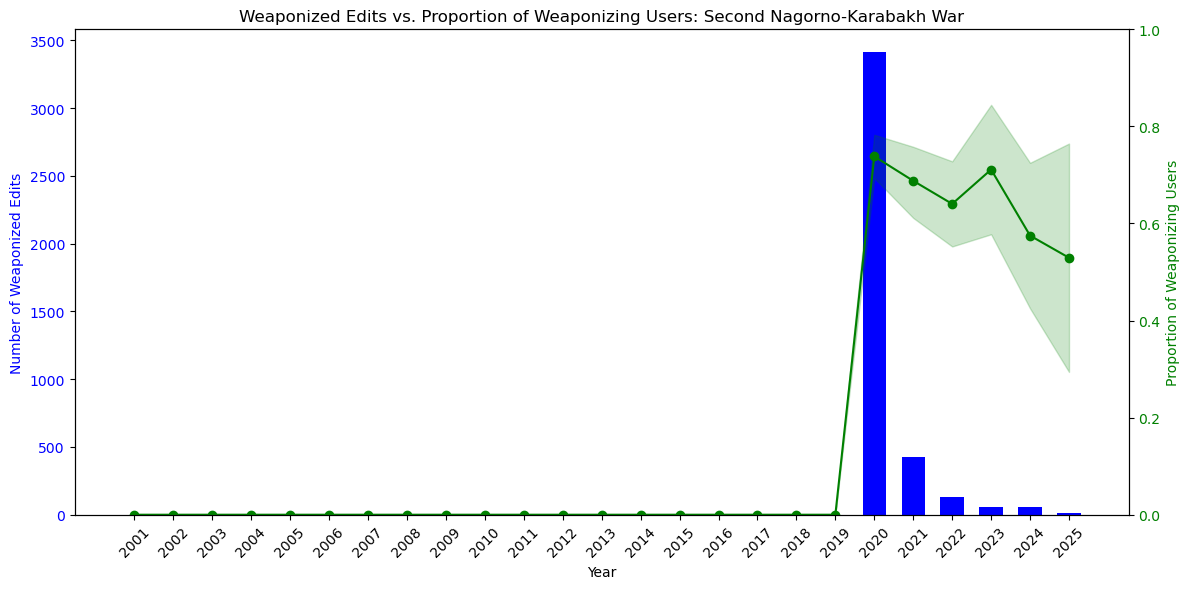

In [9]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import binom

# -------------------------------
# Configuration
# -------------------------------
input_dir = "../csv_files_demo"
user_id_pattern = re.compile(r"^\d{1,3}(\.\d{1,3}){3}$")  # IP-style usernames

# -------------------------------
# Helper: Check if user string is valid
# -------------------------------
def is_valid_user(user):
    return isinstance(user, str) and len(user.strip()) > 0

# -------------------------------
# Step 1: Load and group weaponized rows
# -------------------------------
all_rows = []

for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path, encoding="utf-8")

        if {"Timestamp", "Judgment", "User", "Source"}.issubset(df.columns):
            df["Year"] = pd.to_datetime(df["Timestamp"], errors='coerce').dt.year
            df["User"] = df["User"].astype(str)
            df = df.dropna(subset=["Year", "Judgment", "User", "Source"])
            all_rows.append(df)

# Combine everything
combined_df = pd.concat(all_rows, ignore_index=True)

# -------------------------------
# Step 2: Compute per-article, per-year data
# -------------------------------
article_groups = combined_df.groupby(combined_df["Source"].apply(
    lambda s: os.path.basename(s).split("_")[0] if isinstance(s, str) else "UNKNOWN"
))

for article, group_df in article_groups:
    year_user_stats = defaultdict(lambda: {
        "weaponized_edits": 0,
        "total_users": set(),
        "weaponizing_users": set(),
    })

    for _, row in group_df.iterrows():
        year = int(row["Year"])
        user = row["User"]
        if not is_valid_user(user):
            continue

        judgment = row["Judgment"].strip().title()
        year_user_stats[year]["total_users"].add(user)
        if judgment == "Weaponised":
            year_user_stats[year]["weaponized_edits"] += 1
            year_user_stats[year]["weaponizing_users"].add(user)

    # Build sorted lists for plotting
    all_years = list(range(2001, 2026))
    weaponized_counts = [year_user_stats[y]["weaponized_edits"] for y in all_years]
    proportion_users = []
    lower_bounds = []
    upper_bounds = []
    for y in all_years:
        total_users = len(year_user_stats[y]["total_users"])
        weaponizing_users = len(year_user_stats[y]["weaponizing_users"])
        if total_users > 0:
            user_proportion = weaponizing_users / total_users
        else:
            user_proportion = 0
        proportion_users.append(user_proportion)
        ci_low, ci_upp = binom.interval(0.95, total_users, user_proportion) if total_users > 0 else (0, 0)
        lower_bounds.append(ci_low / total_users if total_users > 0 else 0)
        upper_bounds.append(ci_upp / total_users if total_users > 0 else 0)

    # -------------------------------
    # Step 3: Plot
    # -------------------------------
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_width = 0.6
    x = range(len(all_years))

    ax1.bar(x, weaponized_counts, color='blue', width=bar_width, label="Weaponized Edits")
    ax1.set_ylabel("Number of Weaponized Edits", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(x)
    ax1.set_xticklabels(all_years, rotation=45)
    ax1.set_xlabel("Year")

    # Twin axis for proportions
    ax2 = ax1.twinx()
    ax2.plot(x, proportion_users, color='green', marker='o', label="Proportion of Weaponizing Users")
    ax2.fill_between(x, lower_bounds, upper_bounds, color='green', alpha=0.2, label="95% CI")
    ax2.set_ylabel("Proportion of Weaponizing Users", color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_ylim(0, 1)

    plt.title(f"Weaponized Edits vs. Proportion of Weaponizing Users: {article}")
    fig.tight_layout()
    plt.show()


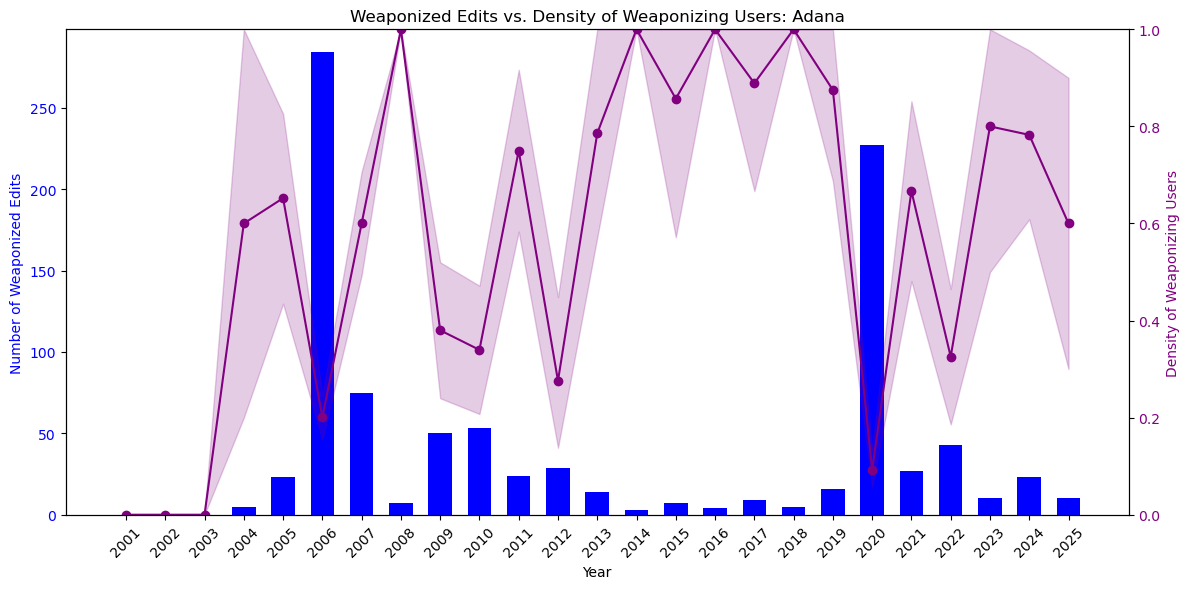

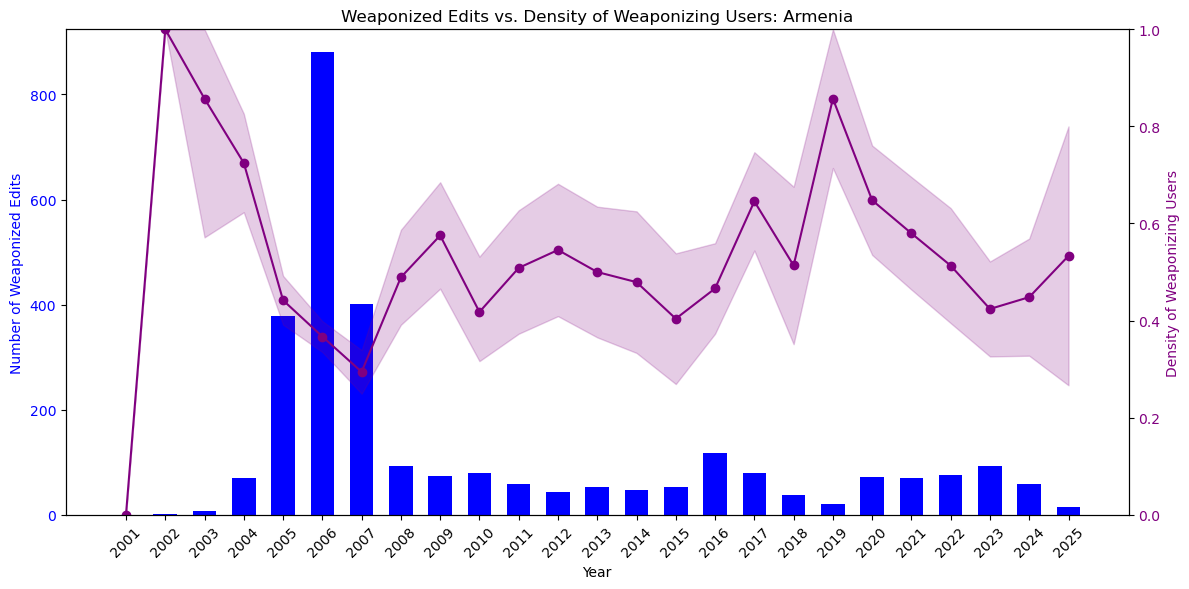

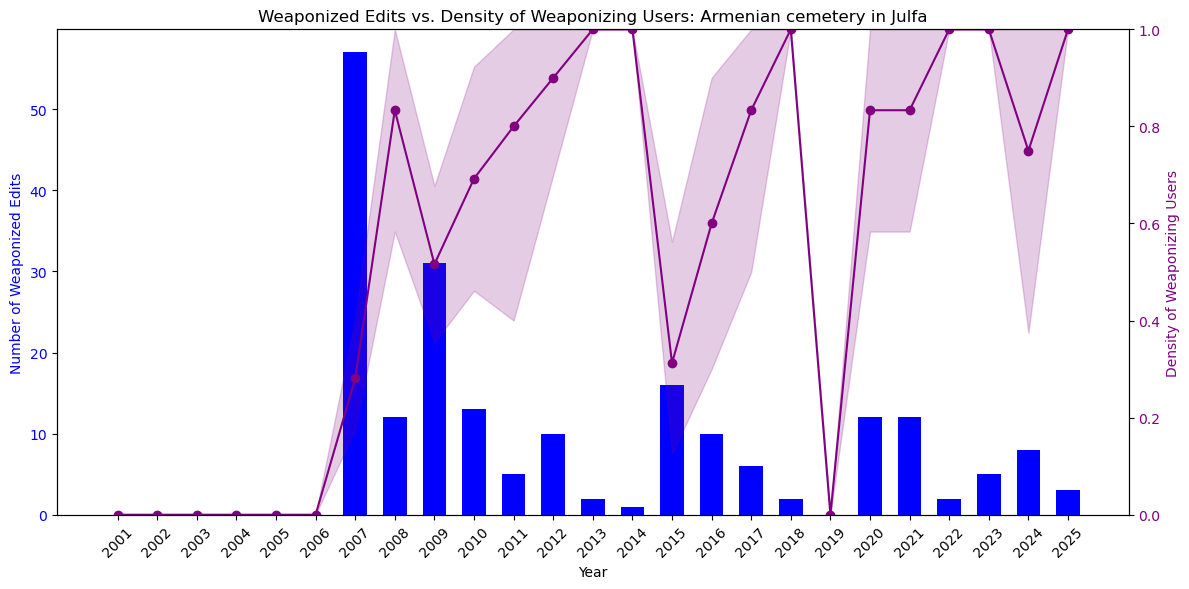

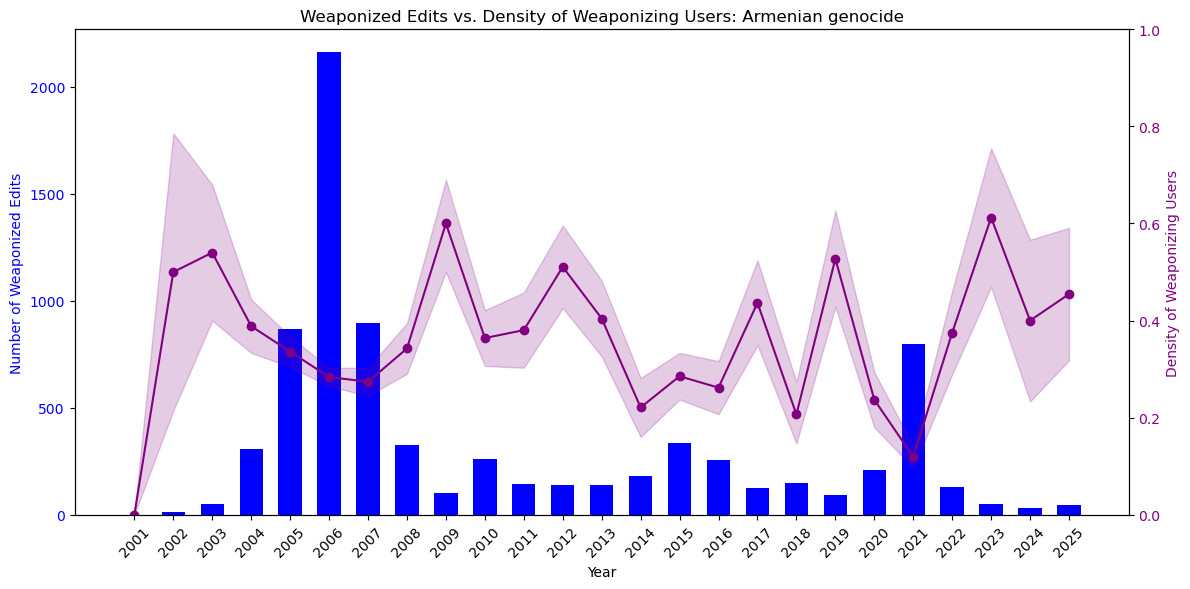

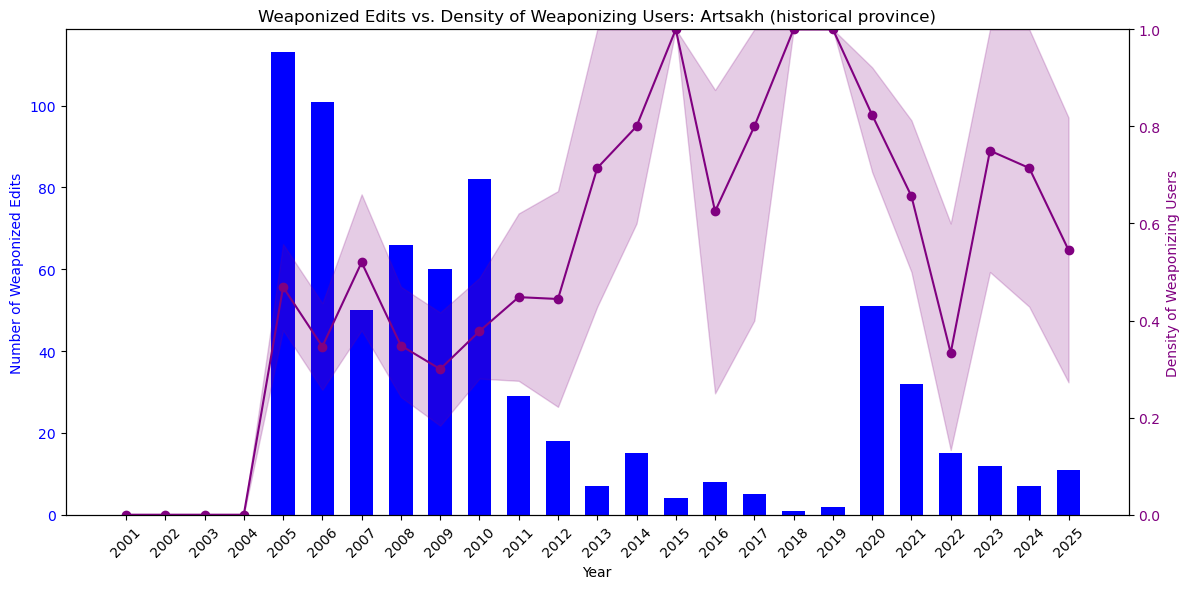

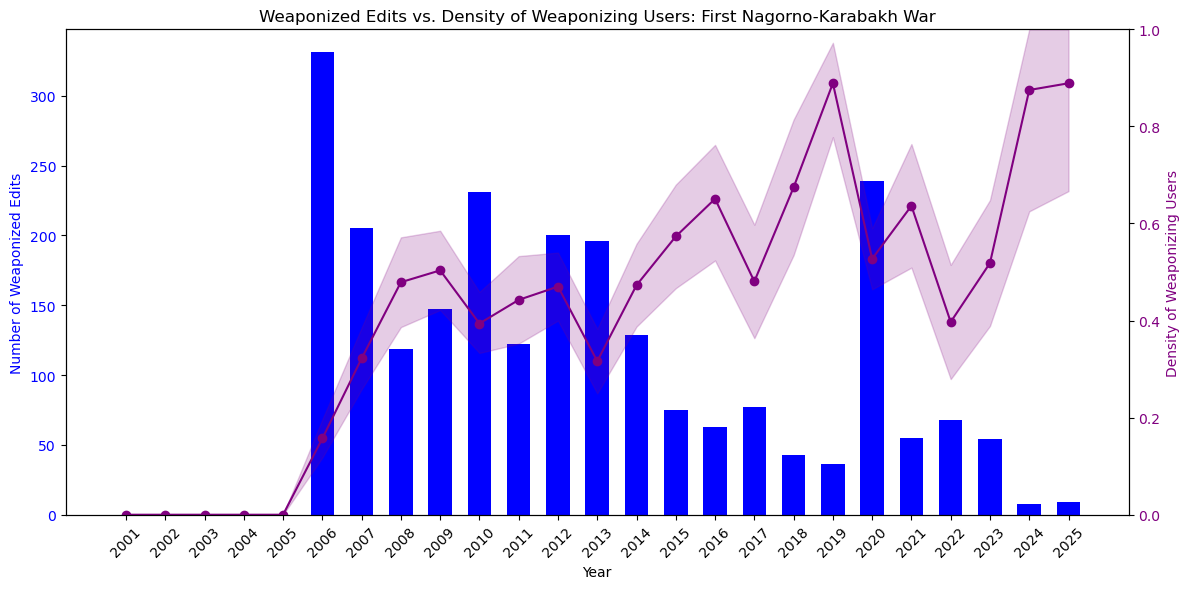

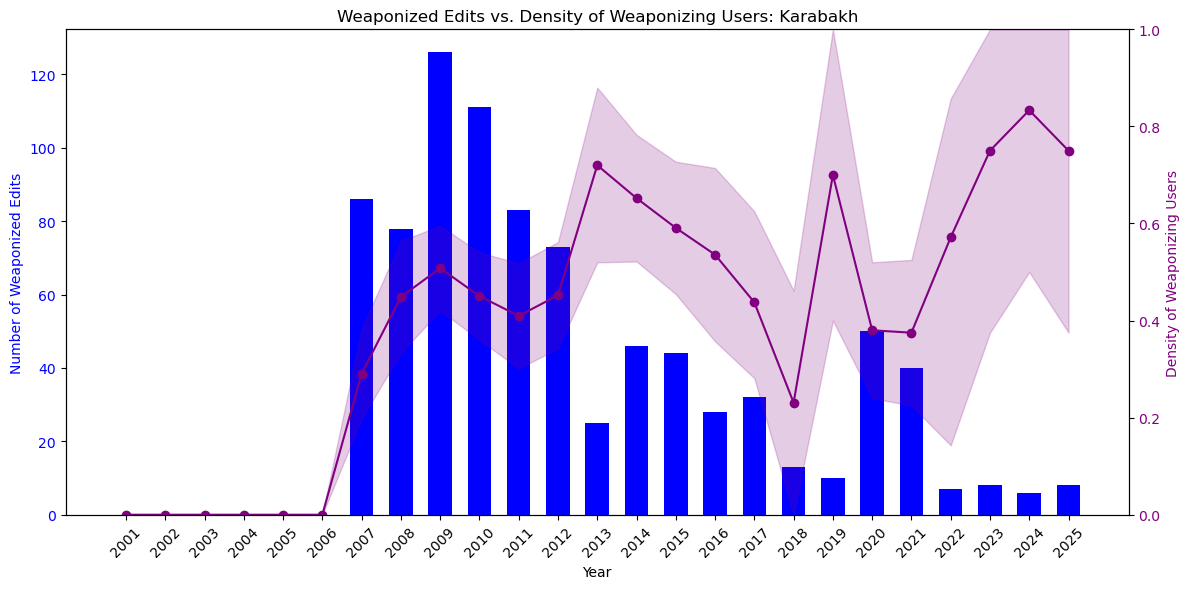

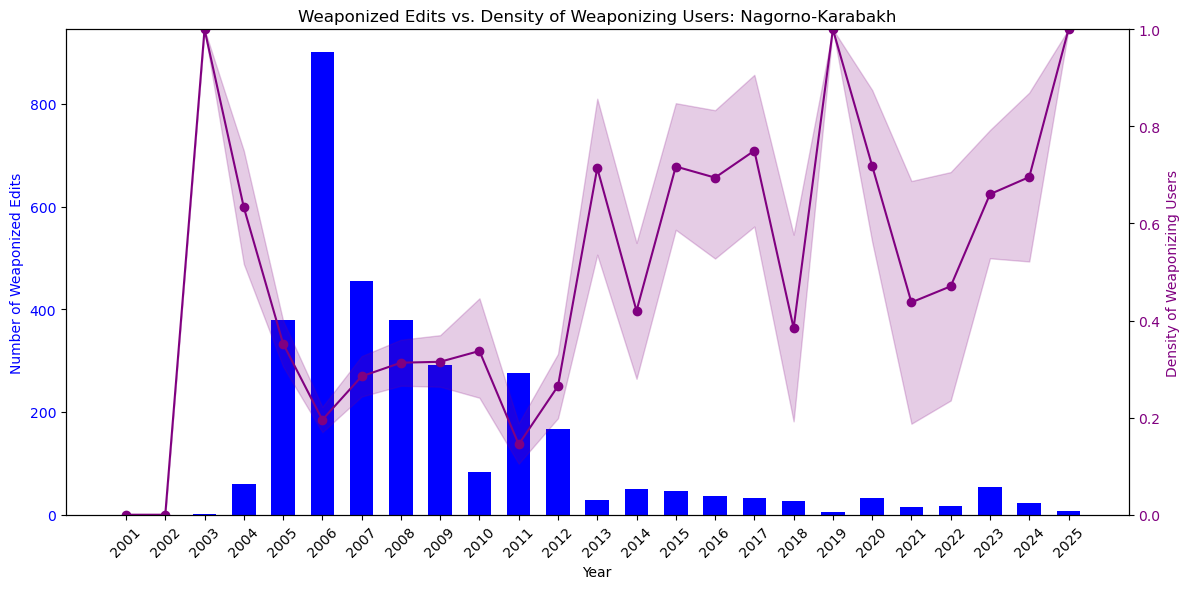

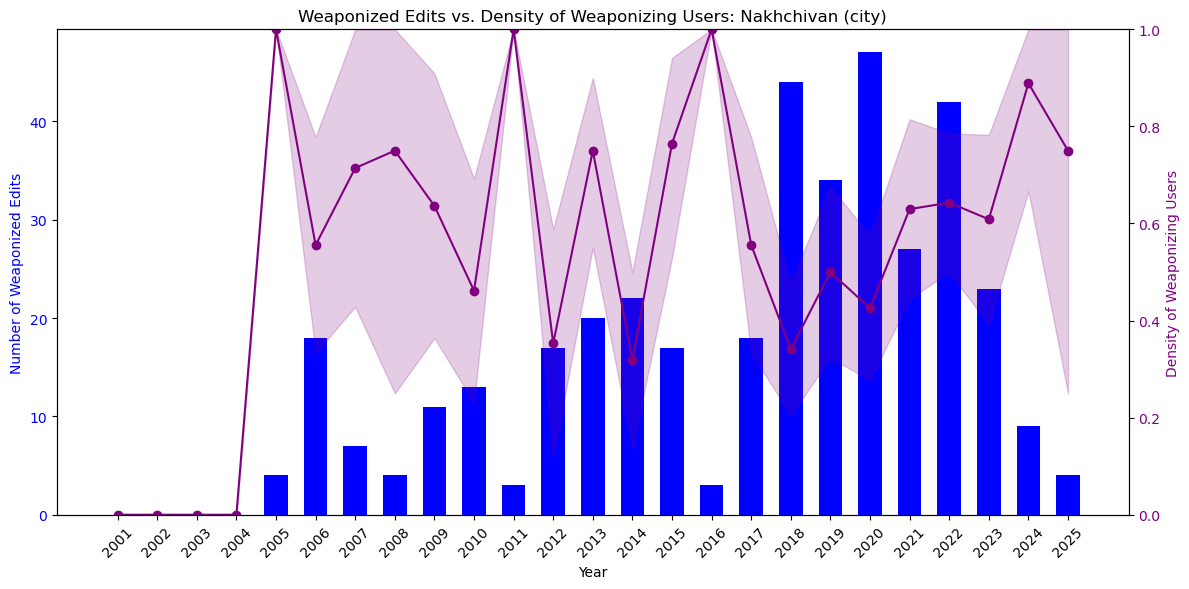

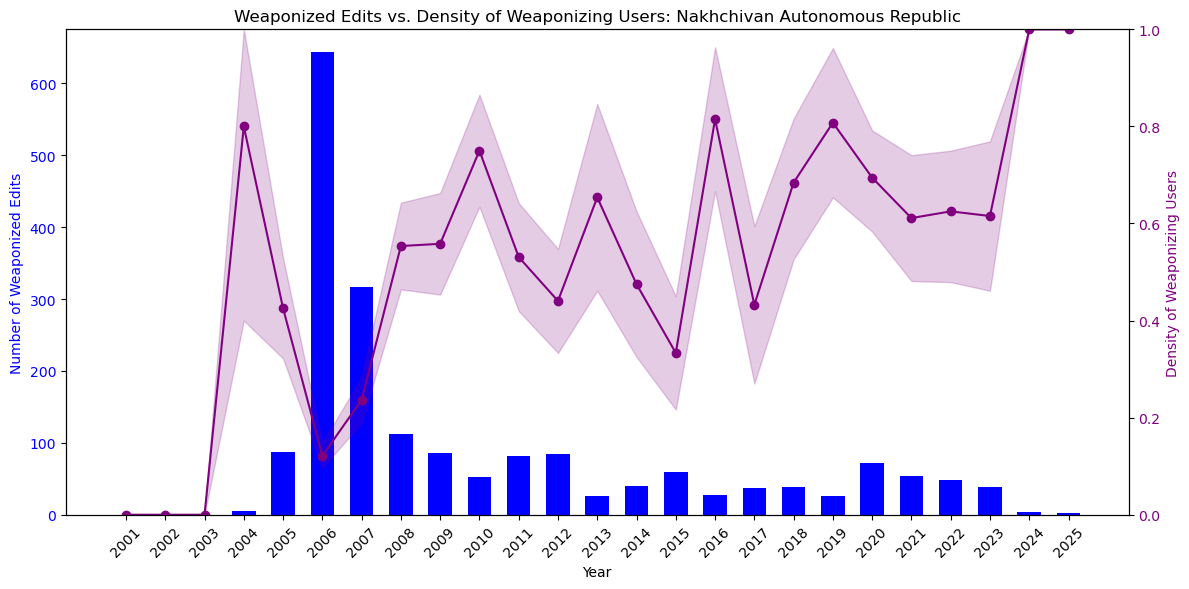

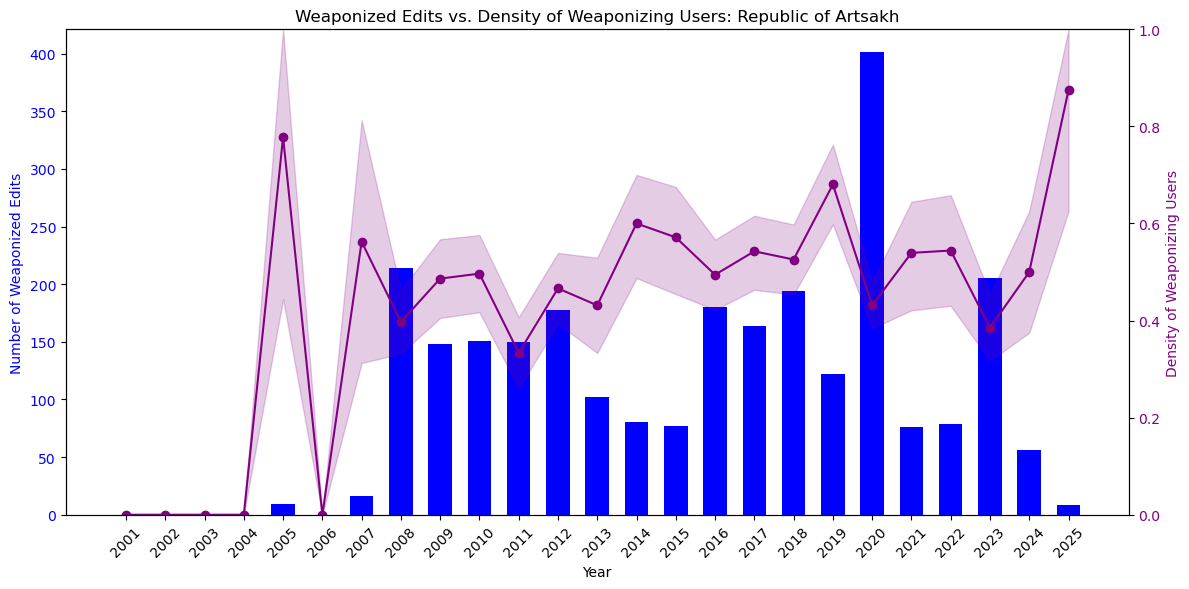

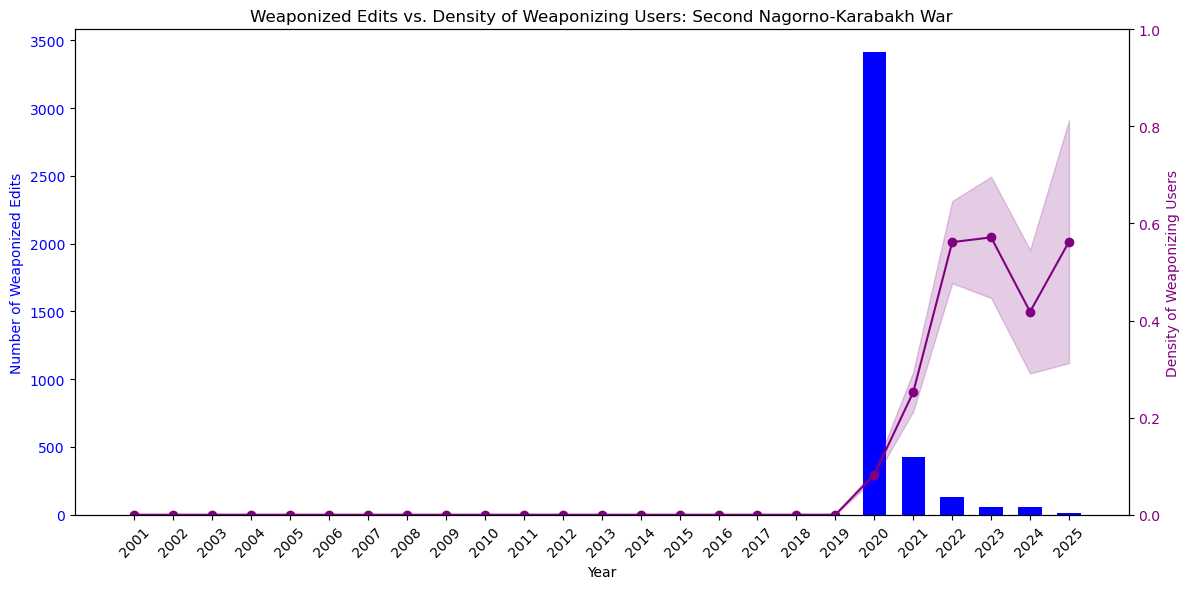

In [16]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import binom

# -------------------------------
# Configuration
# -------------------------------
input_dir = "../csv_files_demo"
user_id_pattern = re.compile(r"^\d{1,3}(\.\d{1,3}){3}$")  # IP-style usernames

# -------------------------------
# Helper: Check if user string is valid
# -------------------------------
def is_valid_user(user):
    return isinstance(user, str) and len(user.strip()) > 0

# -------------------------------
# Step 1: Load and group weaponized rows
# -------------------------------
all_rows = []

for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path, encoding="utf-8")

        if {"Timestamp", "Judgment", "User", "Source"}.issubset(df.columns):
            df["Year"] = pd.to_datetime(df["Timestamp"], errors='coerce').dt.year
            df["User"] = df["User"].astype(str)
            df = df.dropna(subset=["Year", "Judgment", "User", "Source"])
            all_rows.append(df)

# Combine everything
combined_df = pd.concat(all_rows, ignore_index=True)

# -------------------------------
# Step 2: Compute per-article, per-year data
# -------------------------------
article_groups = combined_df.groupby(combined_df["Source"].apply(
    lambda s: os.path.basename(s).split("_")[0] if isinstance(s, str) else "UNKNOWN"
))

for article, group_df in article_groups:
    year_user_stats = defaultdict(lambda: {
        "weaponized_edits": 0,
        "total_users": set(),
        "weaponizing_users": set(),
    })

    for _, row in group_df.iterrows():
        year = int(row["Year"])
        user = row["User"]
        if not is_valid_user(user):
            continue

        judgment = row["Judgment"].strip().title()
        year_user_stats[year]["total_users"].add(user)
        if judgment == "Weaponised":
            year_user_stats[year]["weaponized_edits"] += 1
            year_user_stats[year]["weaponizing_users"].add(user)

    # Build sorted lists for plotting
    # Density of weaponizing users per weaponized edit:
    # aka the higher the density means the more diverse the user base contributing to weaponized edits
    all_years = list(range(2001, 2026))
    density_users = []
    lower_bounds = []
    upper_bounds = []
    weaponized_counts = [year_user_stats[y]["weaponized_edits"] for y in all_years]
    for y in all_years:
        year_weaponized_count = year_user_stats[y]["weaponized_edits"]
        total_users = len(year_user_stats[y]["total_users"])
        weaponizing_users = len(year_user_stats[y]["weaponizing_users"])
        if year_weaponized_count > 0:
            user_density = weaponizing_users / year_weaponized_count if year_weaponized_count > 0 else 0
        else:
            user_density = 0
        density_users.append(user_density)
        ci_low, ci_upp = binom.interval(0.95, year_weaponized_count, user_density) if year_weaponized_count > 0 else (0, 0)
        lower_bounds.append(ci_low / year_weaponized_count if year_weaponized_count > 0 else 0)
        upper_bounds.append(ci_upp / year_weaponized_count if year_weaponized_count > 0 else 0)

    # -------------------------------
    # Step 3: Plot
    # -------------------------------
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_width = 0.6
    x = range(len(all_years))

    ax1.bar(x, weaponized_counts, color='blue', width=bar_width, label="Weaponized Edits")
    ax1.set_ylabel("Number of Weaponized Edits", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(x)
    ax1.set_xticklabels(all_years, rotation=45)
    ax1.set_xlabel("Year")

    # Twin axis for proportions
    ax2 = ax1.twinx()
    ax2.plot(x, density_users, color='purple', marker='o', label="Density of Weaponizing Users")
    ax2.fill_between(x, lower_bounds, upper_bounds, color='purple', alpha=0.2, label="95% CI")
    ax2.set_ylabel("Density of Weaponizing Users", color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.set_ylim(0, 1)

    plt.title(f"Weaponized Edits vs. Density of Weaponizing Users: {article}")
    fig.tight_layout()
    plt.show()

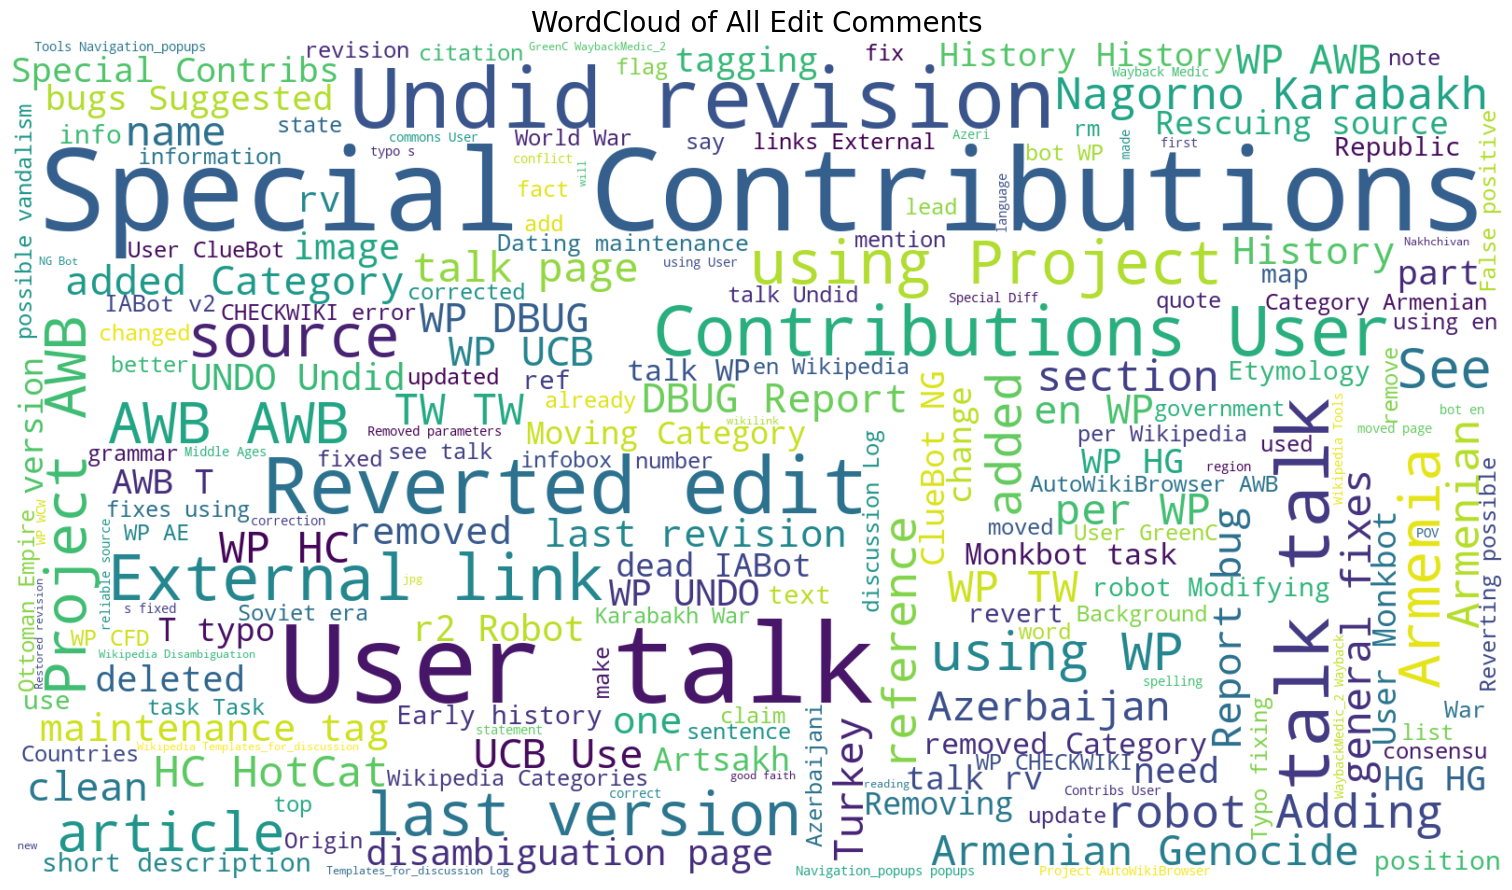

In [1]:
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Directory containing JSONL files
input_dir = "../revisions_new"

# Collect all comments into one big string
all_comments = []

for file_name in os.listdir(input_dir):
    if file_name.endswith(".jsonl"):
        file_path = os.path.join(input_dir, file_name)
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                if line.strip():
                    try:
                        data = json.loads(line)
                        comment = data.get("Comment", "")
                        if comment:
                            all_comments.append(comment)
                    except json.JSONDecodeError:
                        continue  # skip malformed lines

# Combine all comments
text_blob = " ".join(all_comments)

# Generate the WordCloud
wordcloud = WordCloud(width=1600, height=900, background_color='white', collocations=True).generate(text_blob)

# Show it
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of All Edit Comments", fontsize=20)
plt.tight_layout()
plt.show()


## Weaponization vs Non-Weaponization of Users that do NOT have IP-like names

In [1]:
# Detection and Extraction of Usernames that are NOT suspicious IP-like across all JSONL Files

import os
import json
import re

# Directory containing JSONL files
directory = "../revisions_full"

# Output file to collect suspicious records
output_path = "../other_outputs/not-suspicious_users_full.jsonl"

# Regex to detect IP-like usernames (IPv4)
ip_like_user_regex = re.compile(r'^\d{1,3}(?:\.\d{1,3}){3}$')

# Counters
total = 0
not_suspicious_count = 0

with open(output_path, 'w', encoding='utf-8') as outfile:
    for filename in os.listdir(directory):
        #print(filename)
        if filename.endswith(".jsonl"):
            filepath = os.path.join(directory, filename)
            total += 1 # Initial version of the article is still counted
            with open(filepath, 'r', encoding='utf-8') as infile:
                for line in infile:
                    try:
                        record = {"Source": filename.split("_")[0]}
                        record.update(json.loads(line))
                        #record["Source"] = filename.split("_")[0]  # Add source field
                        user = record.get("User")
                        if user:
                            total += 1
                            if not ip_like_user_regex.match(user): # inverting the condition
                                not_suspicious_count += 1
                                outfile.write(json.dumps(record, ensure_ascii=False) + "\n")
                    except json.JSONDecodeError:
                        continue  # Skip malformed lines

print(f"Total records: {total}")
print(f"Not suspicious IP-like usernames found: {not_suspicious_count}")
print(f"Not suspicious records written to: {output_path}")


Total records: 301390
Not suspicious IP-like usernames found: 252685
Not suspicious records written to: ../other_outputs/not-suspicious_users_full.jsonl


In [9]:
# This but for the sample documents alone

import os
import json
import re

# Directory containing JSONL files
directory = "../enriched_demo"

# Output file to collect suspicious records
output_path = "../other_outputs/not-suspicious_users.jsonl"

# Regex to detect IP-like usernames (IPv4)
ip_like_user_regex = re.compile(r'^\d{1,3}(?:\.\d{1,3}){3}$')

# Counters
total = 0
not_suspicious_count = 0

with open(output_path, 'w', encoding='utf-8') as outfile:
    for filename in os.listdir(directory):
        #print(filename)
        if filename.endswith(".jsonl"):
            filepath = os.path.join(directory, filename)
            total += 1 # Initial version of the article is still counted
            with open(filepath, 'r', encoding='utf-8') as infile:
                for line in infile:
                    try:
                        record = {"Source": filename.split("_")[0]}
                        record.update(json.loads(line))
                        #record["Source"] = filename.split("_")[0]  # Add source field
                        user = record.get("User")
                        if user:
                            total += 1
                            if not ip_like_user_regex.match(user): # inverting the condition
                                not_suspicious_count += 1
                                outfile.write(json.dumps(record, ensure_ascii=False) + "\n")
                    except json.JSONDecodeError:
                        continue  # Skip malformed lines

print(f"Total records: {total}")
print(f"Not suspicious IP-like usernames found: {not_suspicious_count}")
print(f"Not suspicious records written to: {output_path}")

Total records: 54565
Not suspicious IP-like usernames found: 46194
Not suspicious records written to: ../other_outputs/not-suspicious_users.jsonl


Suspicious user entries saved to ../other_outputs/non-suspicious_users_combined.csv


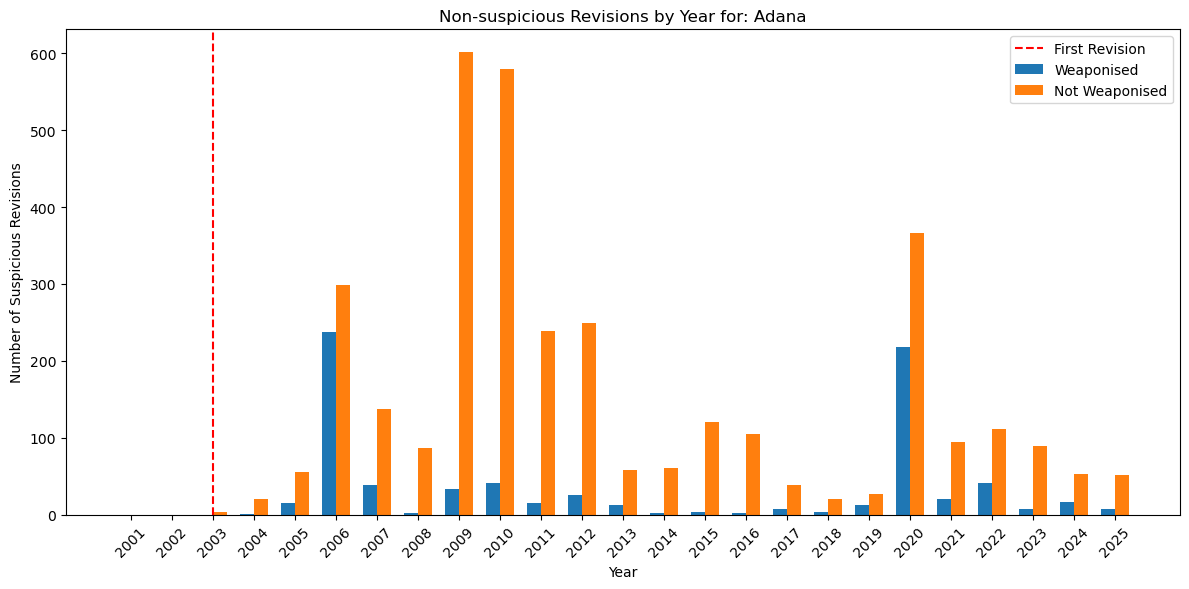

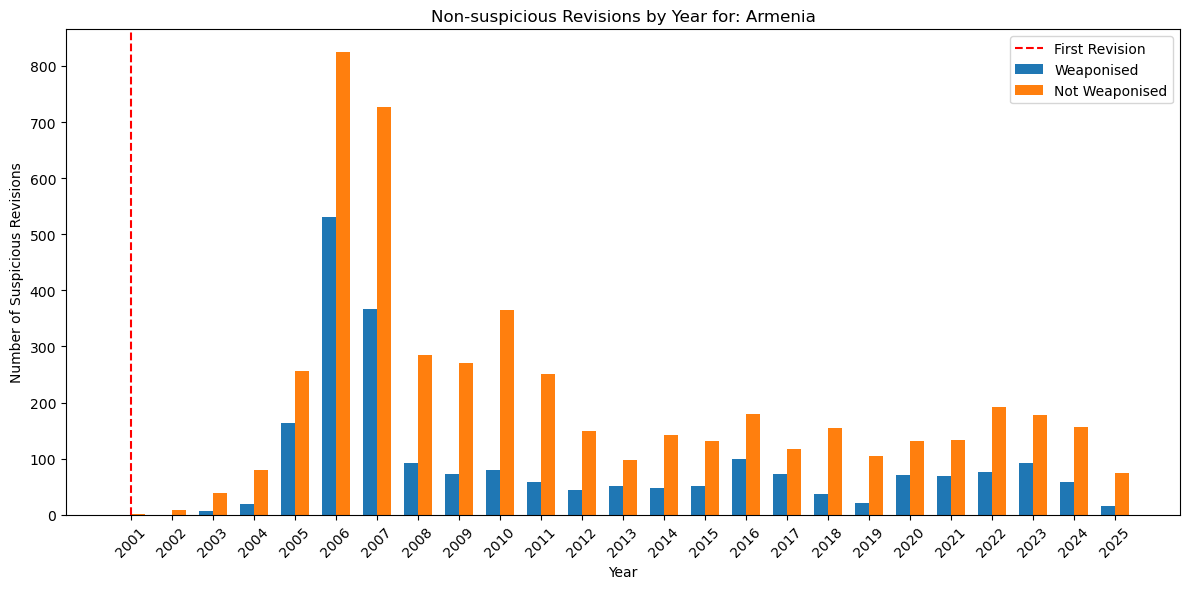

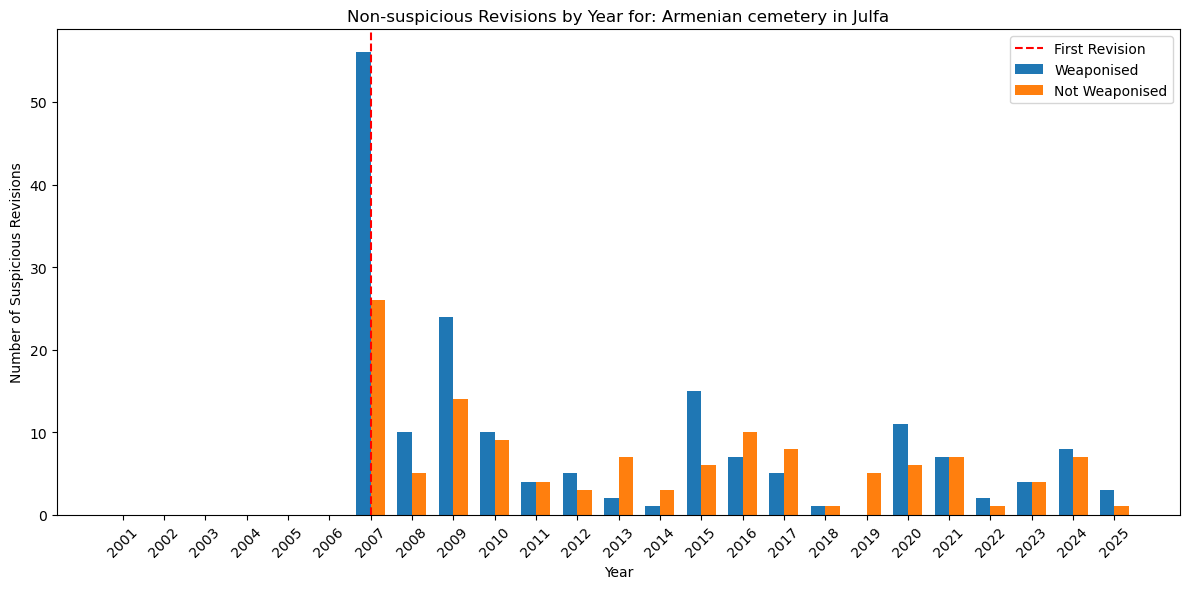

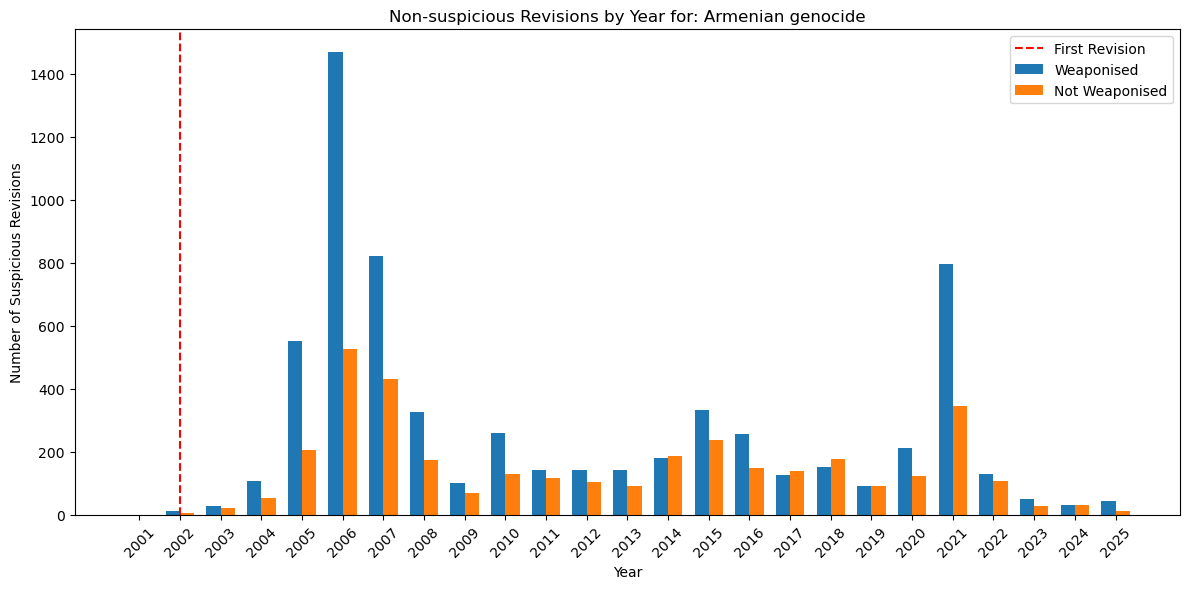

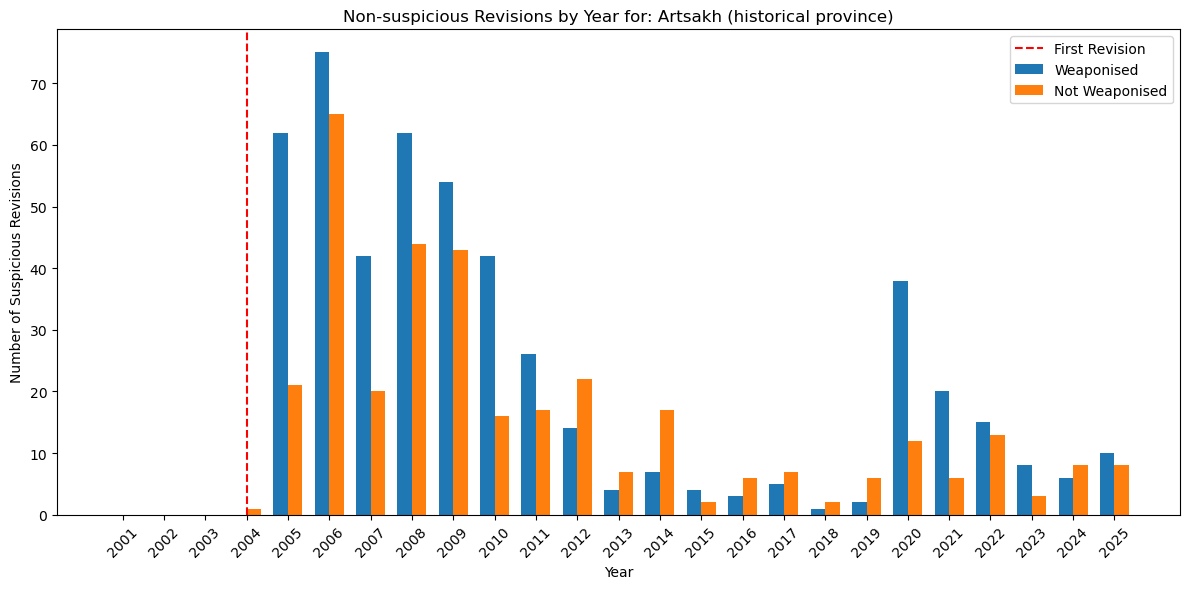

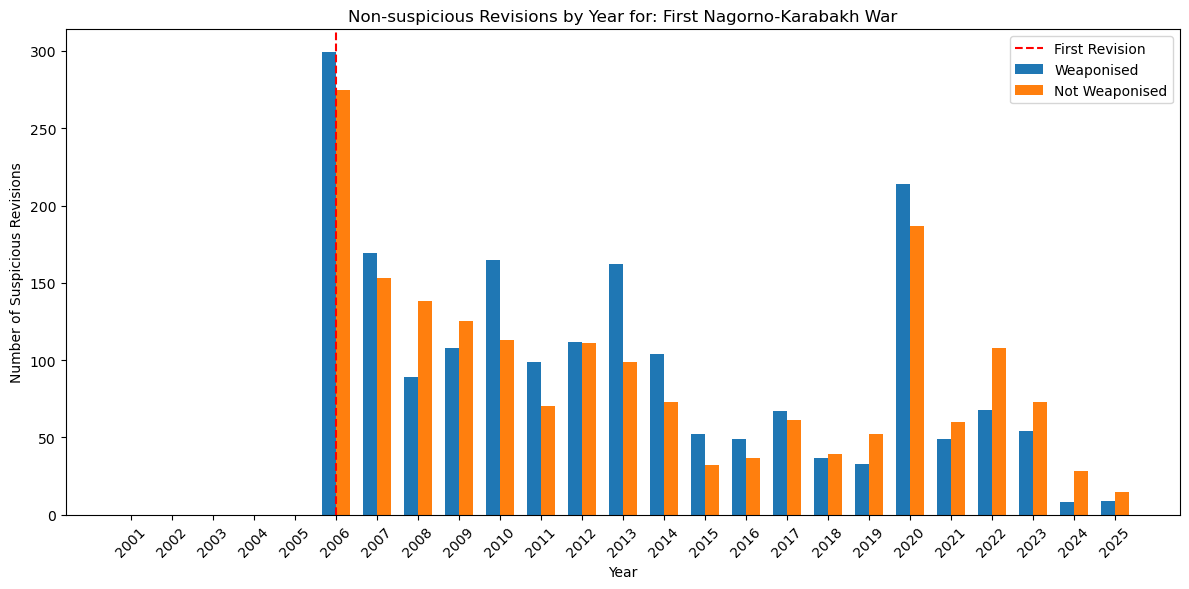

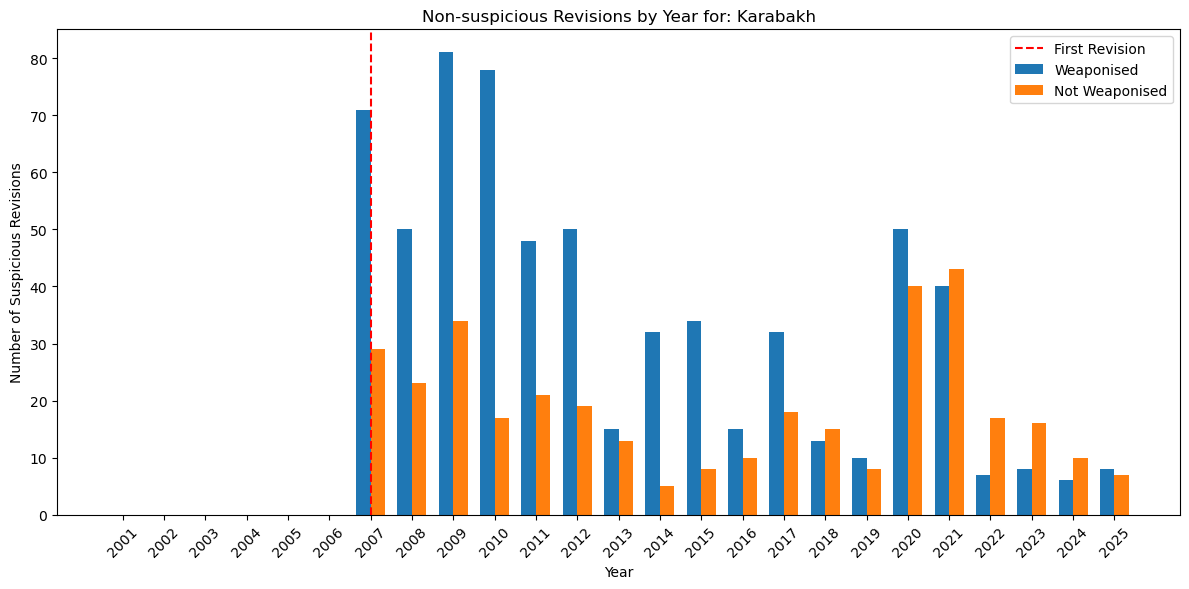

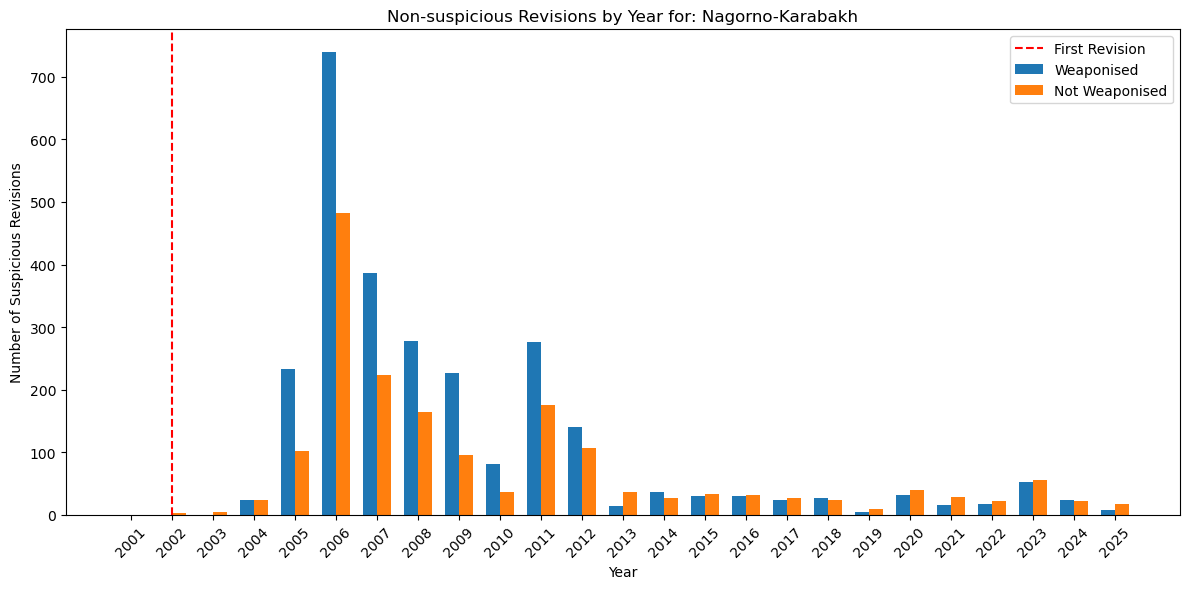

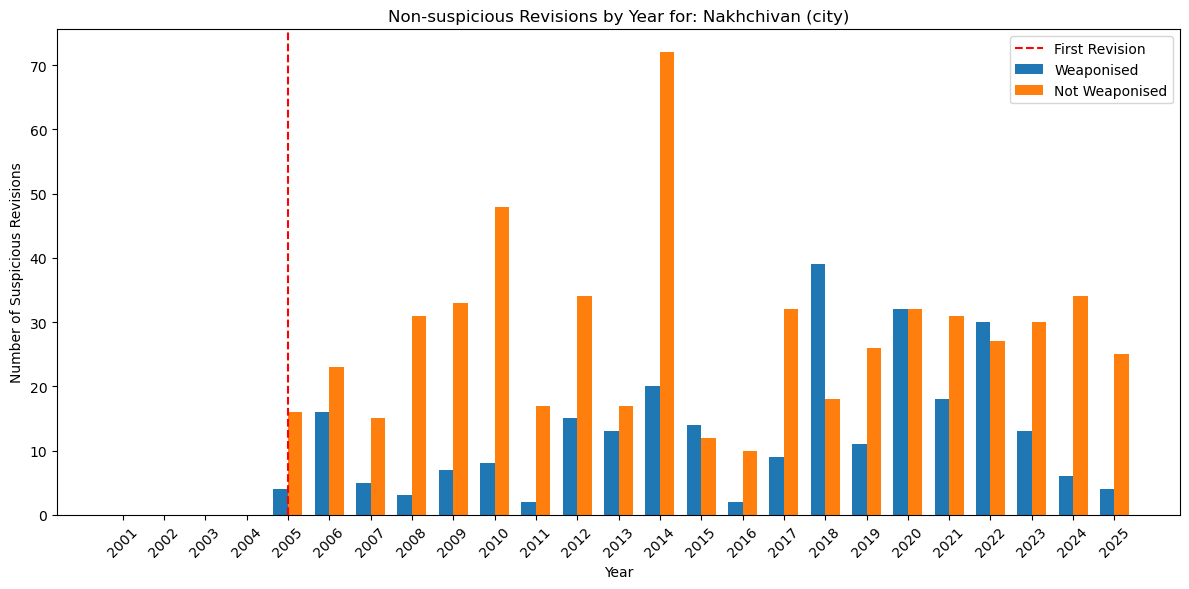

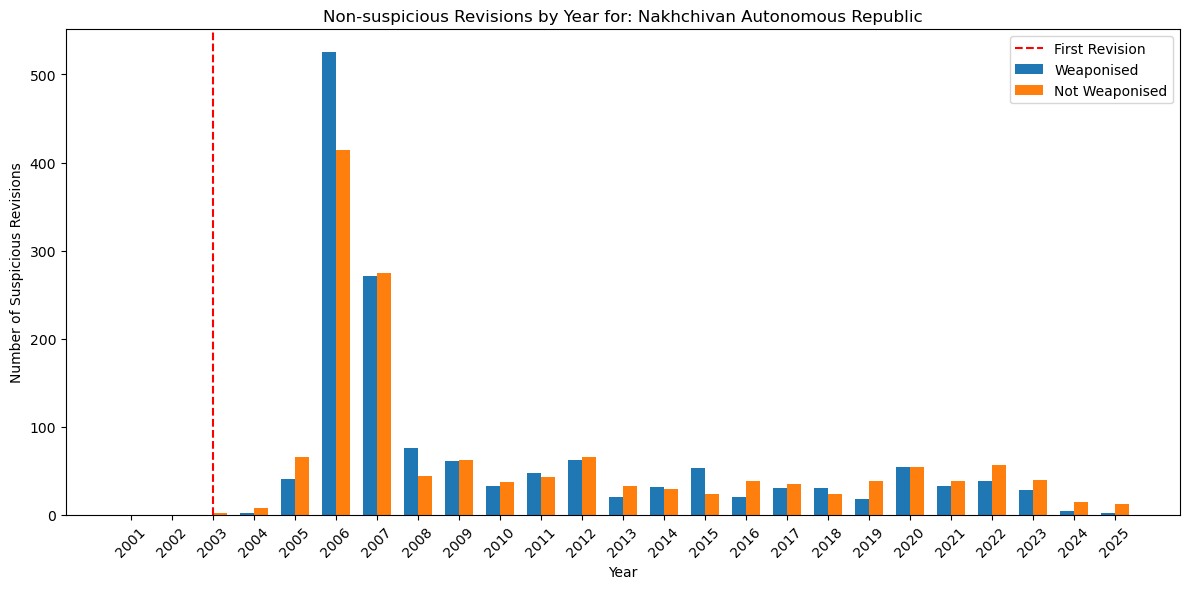

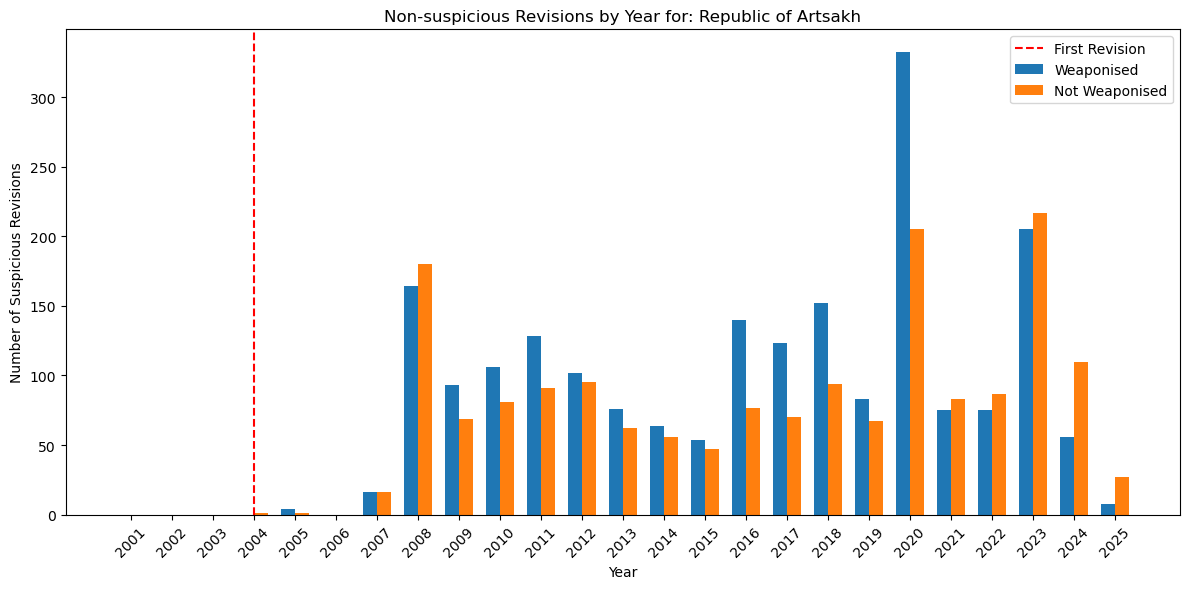

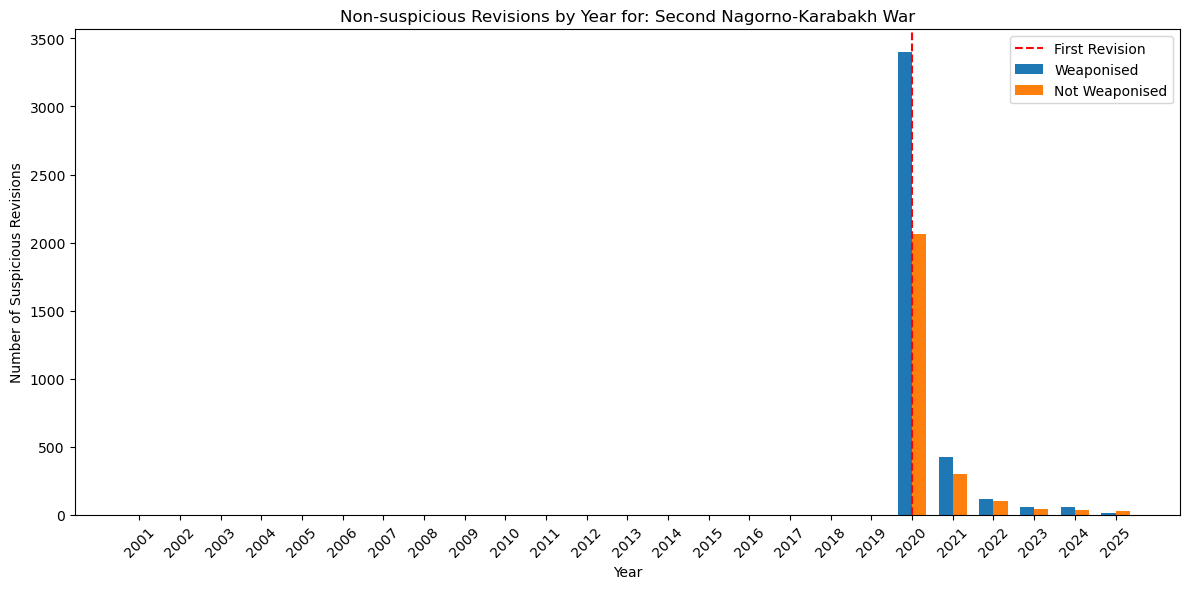

In [3]:
# csv version


import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# -------------------------------
# Configuration
# -------------------------------
input_dir = "../csv_files"
output_file = "../other_outputs/non-suspicious_users_combined.csv"

# -------------------------------
# Helper: Check if string is an IP address
# -------------------------------
def is_not_suspicious_user(user):
    return not bool(re.match(r"^\d{1,3}(\.\d{1,3}){3}$", str(user)))

# -------------------------------
# Step 1: Load all CSV files and collect suspicious user rows
# -------------------------------
all_not_suspicious_rows = []

for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path, encoding="utf-8")
        not_suspicious_rows = df[df["User"].apply(is_not_suspicious_user)].copy()
        if not not_suspicious_rows.empty:
            all_not_suspicious_rows.append(not_suspicious_rows)


# Combine all suspicious rows into one DataFrame and save
if all_not_suspicious_rows:
    combined_df = pd.concat(all_not_suspicious_rows, ignore_index=True)
    combined_df.to_csv(output_file, index=False, encoding="utf-8")
    print(f"Suspicious user entries saved to {output_file}")
else:
    print("No suspicious users found.")

# -------------------------------
# Step 2: Plot bar chart of year counts split by judgment, per article
# -------------------------------
# Add a new column for Year
combined_df["Year"] = pd.to_datetime(combined_df["Timestamp"], errors='coerce').dt.year
combined_df = combined_df.dropna(subset=["Year", "Source", "Judgment"])  # Drop bad timestamps or missing data

# Group data: {source: {year: {"Weaponised": x, "Not Weaponised": y}}}
data = defaultdict(lambda: defaultdict(lambda: {"Weaponised": 0, "Not Weaponised": 0}))

for _, row in combined_df.iterrows():
    src = row["Source"].split("/")[-1].split("_")[0]
    year = int(row["Year"])
    judgment = row["Judgment"].strip().title()
    if judgment in ["Weaponised", "Not Weaponised"]:
        data[src][year][judgment] += 1

# Plot per article
for src, year_data in data.items():
    # Fixed range of years
    all_years = list(range(2001, 2026))

    weaponised_counts = [year_data[y]["Weaponised"] if y in year_data else 0 for y in all_years]
    not_weaponised_counts = [year_data[y]["Not Weaponised"] if y in year_data else 0 for y in all_years]

    bar_width = 0.35
    x = range(len(all_years))

    plt.figure(figsize=(12, 6))
    plt.bar(x, weaponised_counts, width=bar_width, label="Weaponised")
    plt.bar([i + bar_width for i in x], not_weaponised_counts, width=bar_width, label="Not Weaponised")

    first_year = int(min(year_data.keys()))
    if 2001 <= first_year <= 2025:
        red_line_index = all_years.index(first_year)
        plt.axvline(x=red_line_index + bar_width / 2, color='red', linestyle='--', label='First Revision')
    
    plt.xlabel("Year")
    plt.ylabel("Number of Suspicious Revisions")
    plt.title(f"Non-suspicious Revisions by Year for: {src}")
    plt.xticks([i + bar_width / 2 for i in x], all_years, rotation=45)  # ✅ Rotate ticks
    plt.legend()
    plt.tight_layout()
    plt.show()